In [28]:
import pandas as pd
pd.pandas.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from statsmodels.api import qqplot

## loading dataset

In [3]:
df=pd.read_csv('forestfires.csv')
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

### since month and day coloumns are unnecessary so we can drop those coloumns

In [5]:
df1=df.drop(['day','month'],axis=1)
df1.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small


In [6]:
df1.shape

(517, 29)

In [7]:
df1.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

## checking duplicates and removing

In [8]:
df1.duplicated().any()

True

In [9]:
df1.duplicated().sum()

8

In [10]:
df1.drop_duplicates(inplace=True)

In [11]:
df1.shape

(509, 29)

## checking Null values

In [12]:
df1.isnull().any()

FFMC             False
DMC              False
DC               False
ISI              False
temp             False
RH               False
wind             False
rain             False
area             False
dayfri           False
daymon           False
daysat           False
daysun           False
daythu           False
daytue           False
daywed           False
monthapr         False
monthaug         False
monthdec         False
monthfeb         False
monthjan         False
monthjul         False
monthjun         False
monthmar         False
monthmay         False
monthnov         False
monthoct         False
monthsep         False
size_category    False
dtype: bool

In [24]:
cat_values=[]
for i in df1.columns:
    if(df1[i].nunique()<10):
        cat_values.append(i)
cat_values

['rain',
 'dayfri',
 'daymon',
 'daysat',
 'daysun',
 'daythu',
 'daytue',
 'daywed',
 'monthapr',
 'monthaug',
 'monthdec',
 'monthfeb',
 'monthjan',
 'monthjul',
 'monthjun',
 'monthmar',
 'monthmay',
 'monthnov',
 'monthoct',
 'monthsep',
 'size_category']

In [25]:
numerical_values=[]
for i in df1.columns:
    if(df1[i].nunique()>10):
        numerical_values.append(i)
numerical_values

['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'area']

## Data Visualization

In [17]:
# function takes a single dataframe column name as argument and
# plots a 1 x 2 subplot contains (pie plot and bar plot)
def plot_categorial(col_name):
    fig, ax = plt.subplots(
        nrows=1, ncols=2, figsize=(14, 5)
    )  # sets 1 x 2 subplots with figure size of (14,5)
    df1[col_name].value_counts().plot.pie(
        
        labels=df1[col_name].unique(),
        shadow=True,
        startangle=180,
        ax=ax[0],
    )  # plots pie chart of given column with % percentage

    df1[col_name].value_counts().plot.bar(
        ax=ax[1]
    )

    fig.suptitle(col_name.title())  # set plot's title
    plt.show()  # shows the plot

In [18]:
# function takes a single dataframe column name as argument and
# plots a single plot contains kernel density estimate plot
def plot_kde(col_name):
    facet = sns.FacetGrid(
        df1, hue="size_category", aspect=4, palette="bright"
    )  # sets a seaborn FacetGrid with hue = "Outcome" and palette as "bright"
    facet.map(
        sns.kdeplot, col_name, shade=True
    )  # kernel density plot of the given dataframe column respect to the dependent column "HeartDisease"
    facet.set(
        xlim=(0, df[col_name].max())
    )  # sets the x axis from 0 to maximum value of the column
    facet.add_legend()  # add legend to the plot
    plt.title(
        col_name + " respect to Outcome"
    )  # sets the title for the plot as "<column name> respect to Outcome"
    plt.show()  # shows the plot

In [19]:
# function takes a single dataframe column name as argument and
# plots a 2 x 2 subplot contains (histogram, quantile-quantile plot, kernel density estimate plot and cumulative density plot)
def plot_distribution(col_name):
    fig, axes = plt.subplots(
        2, 2, figsize=(15, 10)
    )  # sets 2 x 2 subplots with figure size of (14,10)
    sns.histplot(
        x=col_name, data=df1, ax=axes[0][0], bins=20
    )  # displays histogram of the given dataframe column
    qqplot(
        data=df1[col_name], ax=axes[0][1], line="45", fit=True, dist=stats.norm
    )  # displays quantile-quantile plot of the given dataframe column
    sns.kdeplot(
        x=col_name, data=df1, ax=axes[1][0], fill=True
    )  # displays kernel density estimate plot of the given dataframe column
    sns.kdeplot(
        x=col_name, data=df1, ax=axes[1][1], fill=True, cumulative=True
    )  # displays cumulative density plot of the given dataframe column
    plt.suptitle(
        "Distribution of " + col_name
    )  # sets the title for the subplot as "Distribution of <column name>"
    plt.show()  # shows the plot

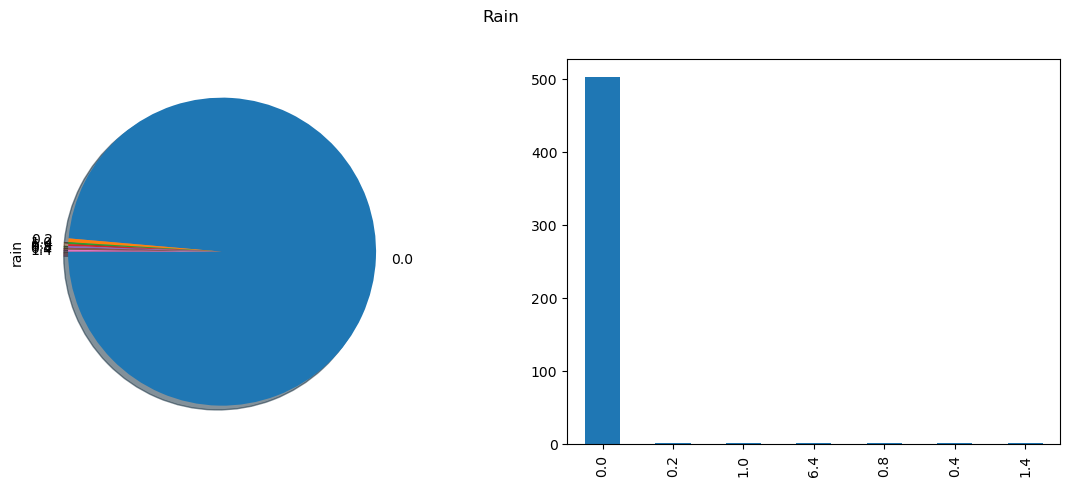

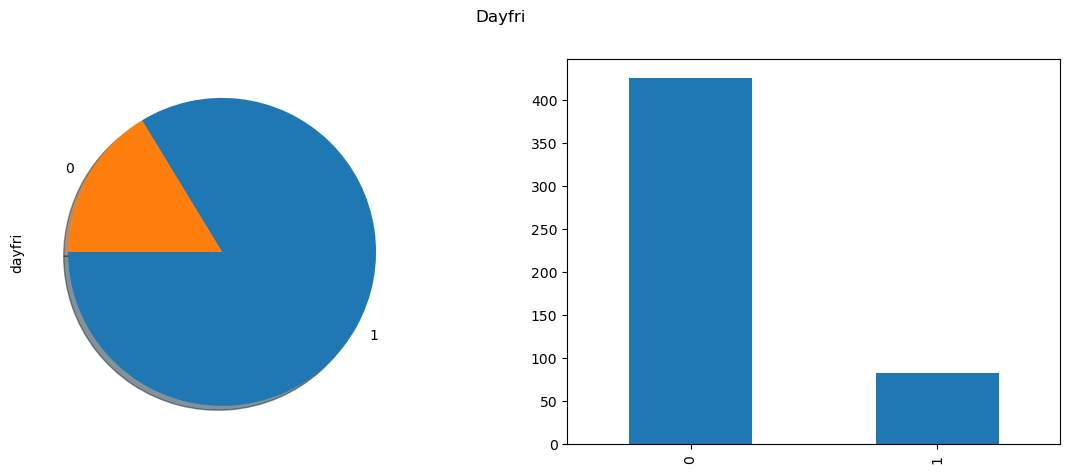

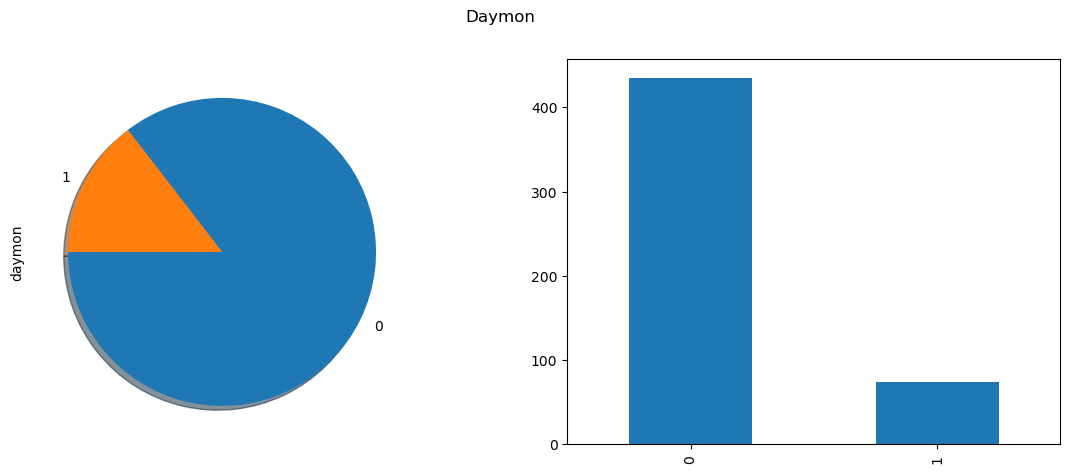

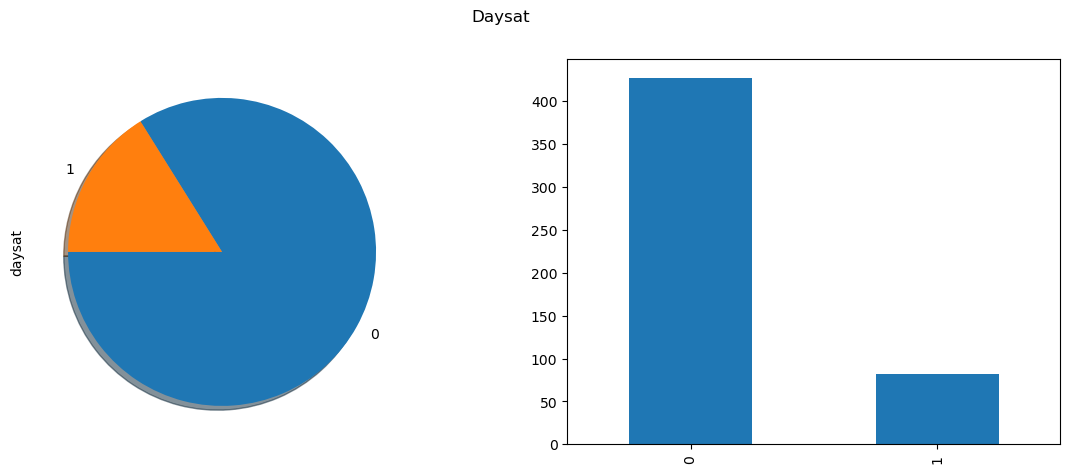

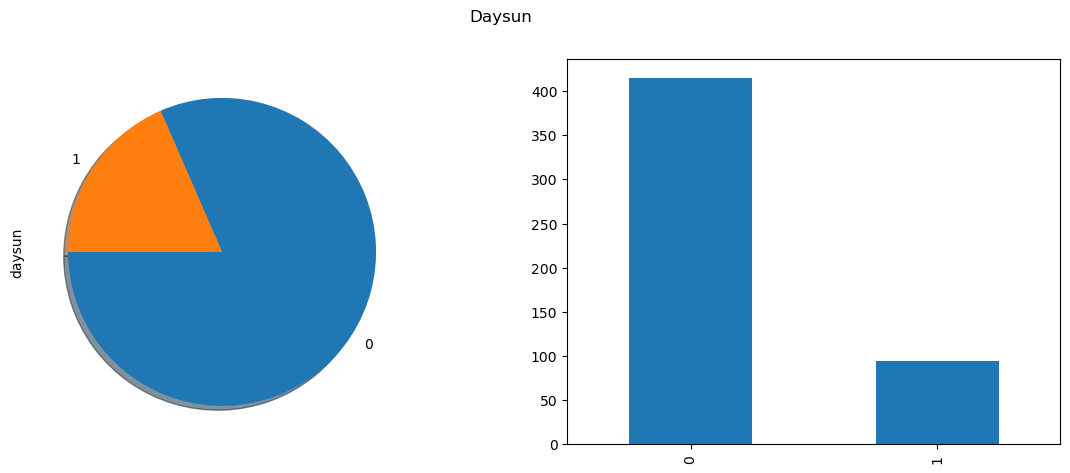

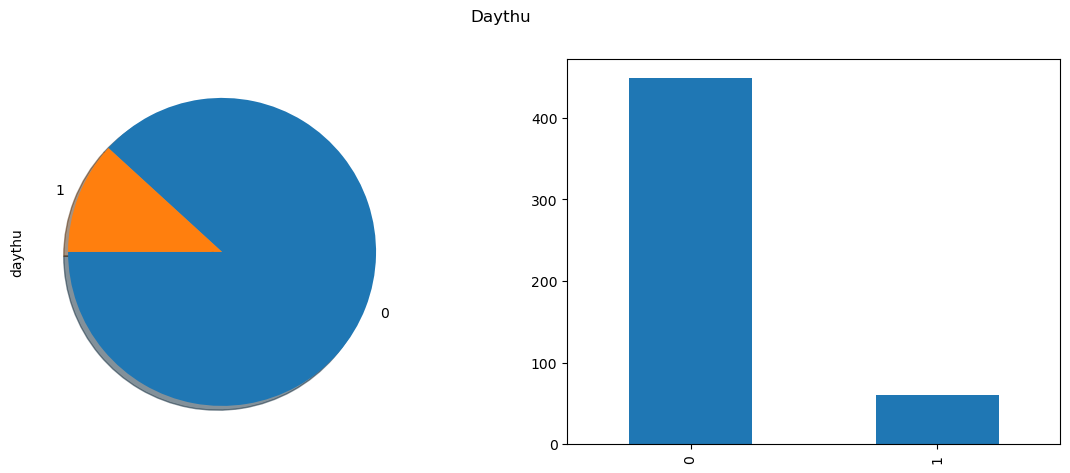

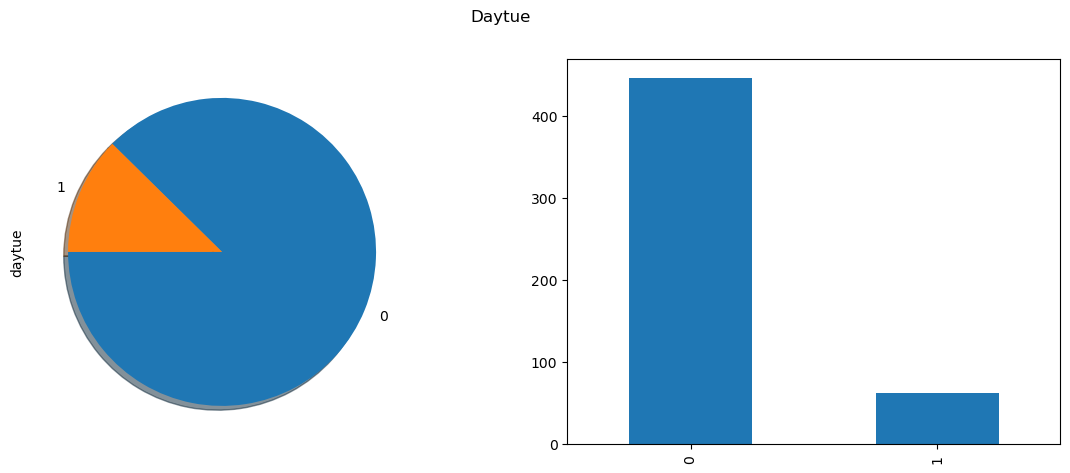

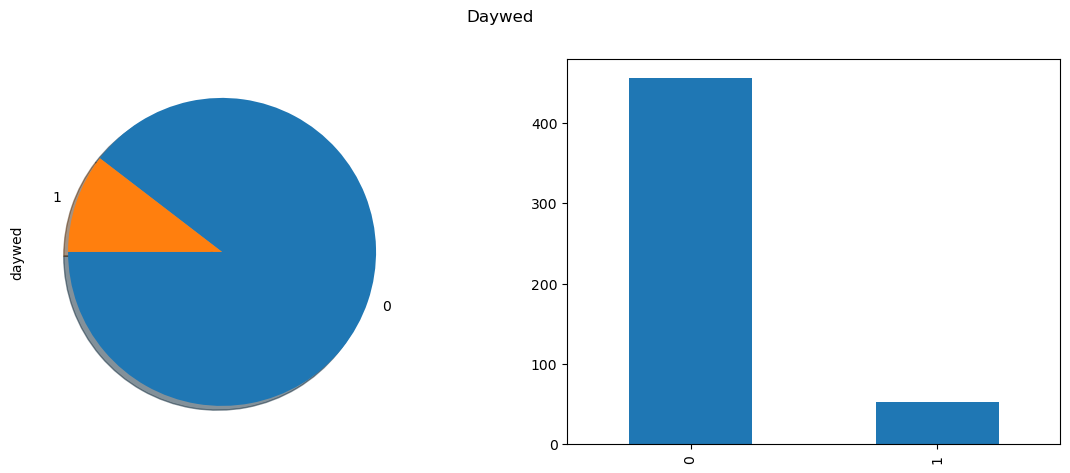

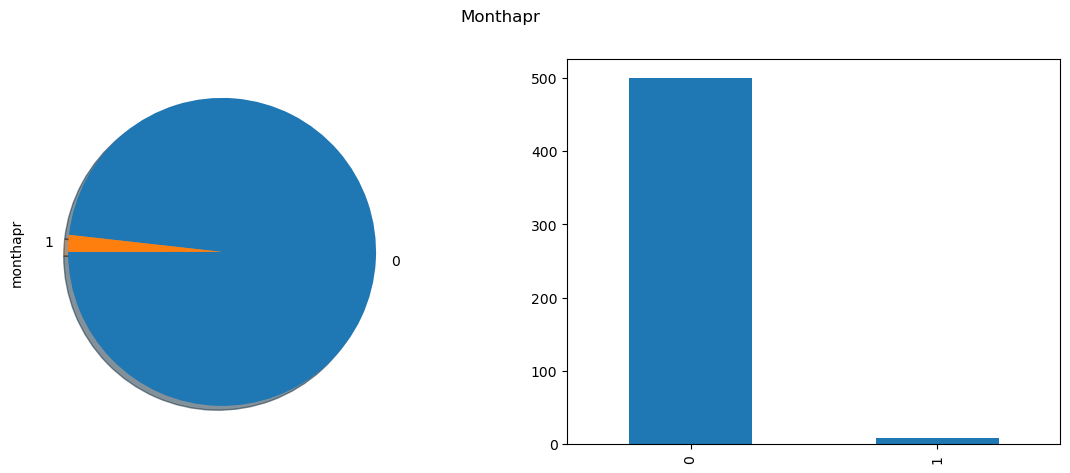

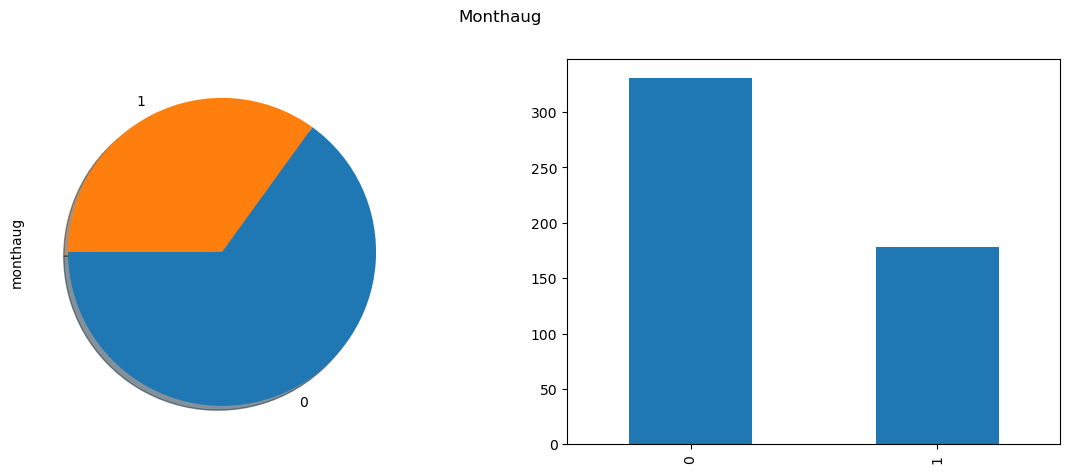

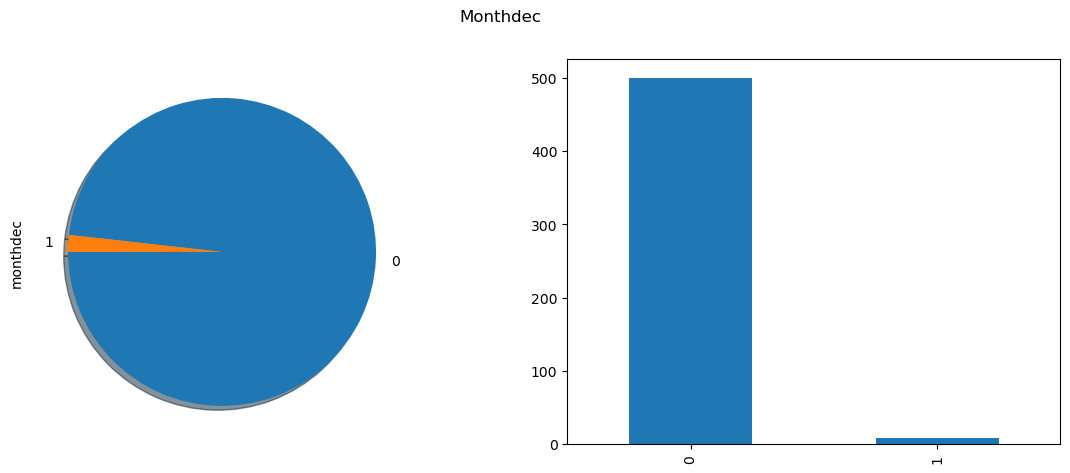

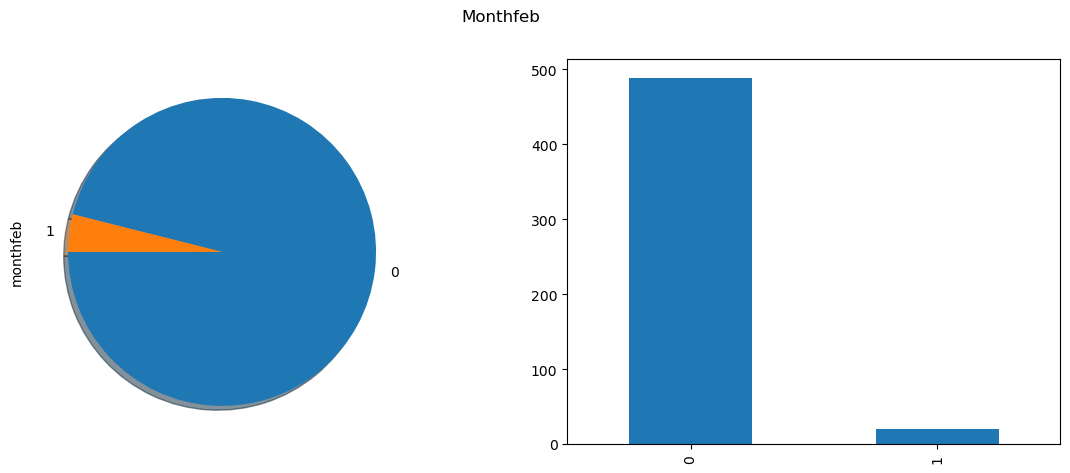

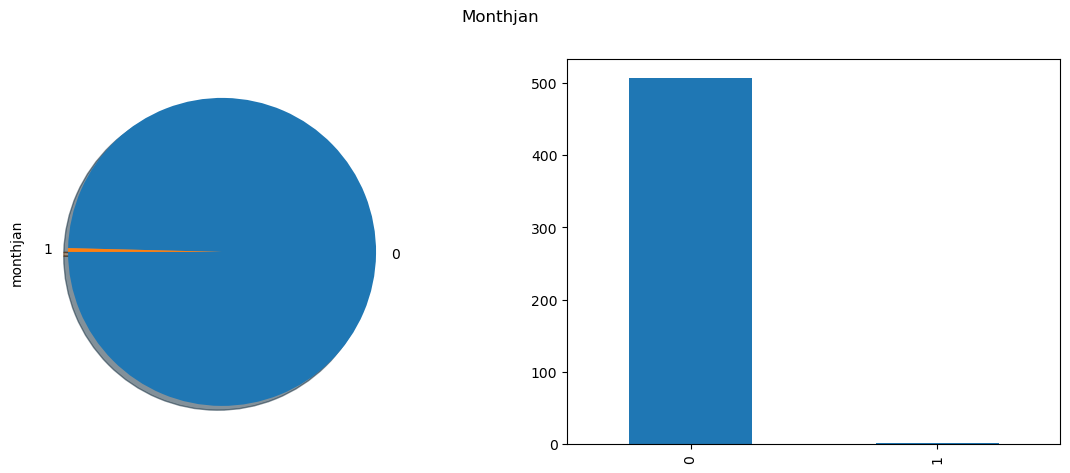

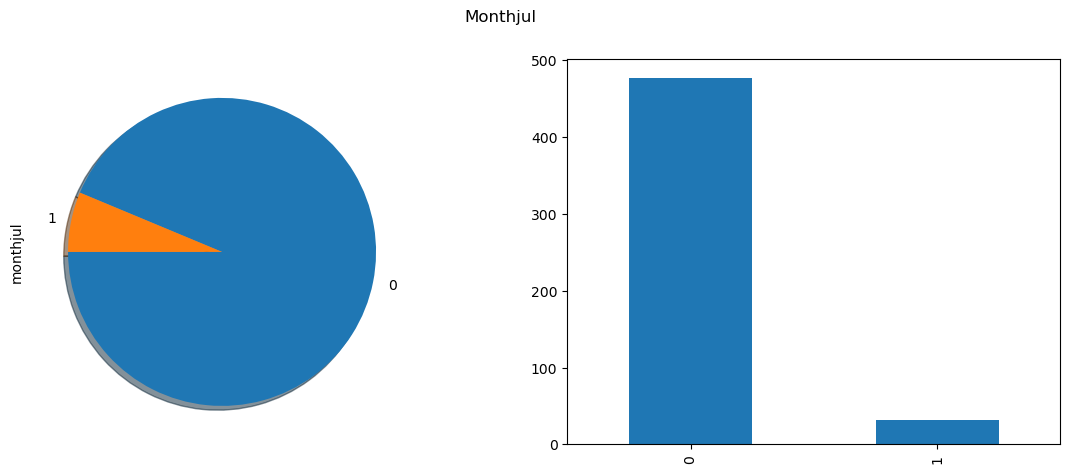

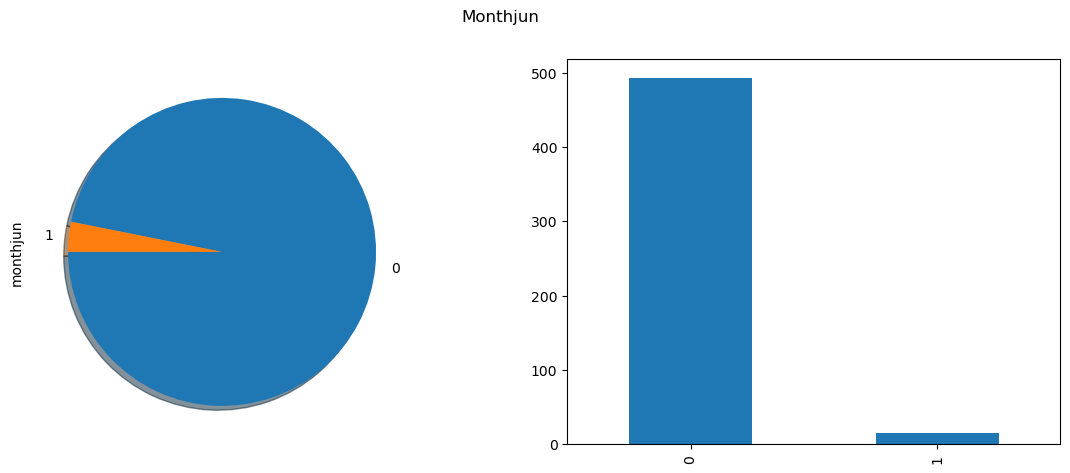

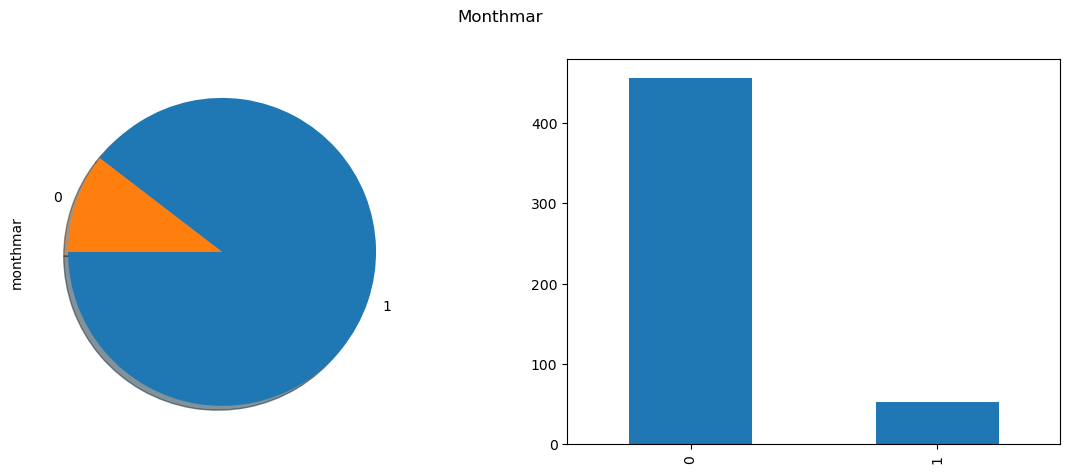

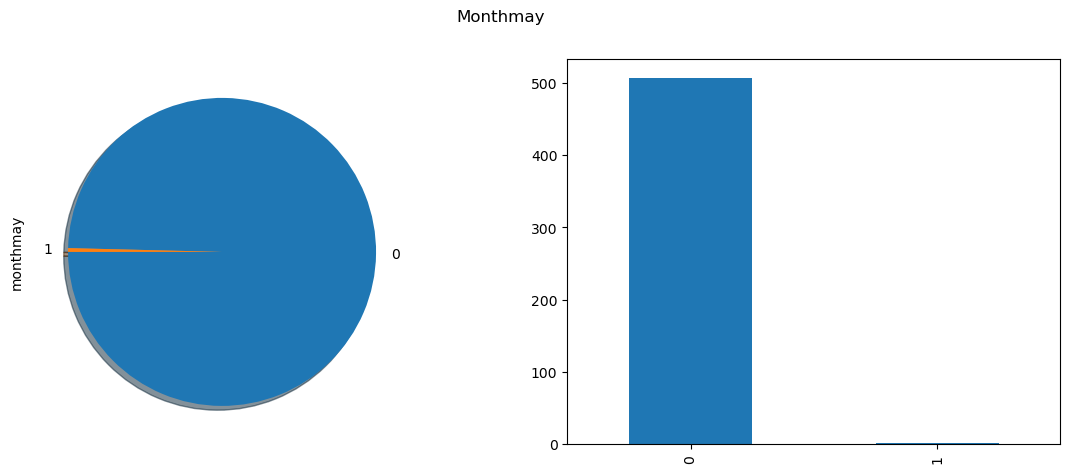

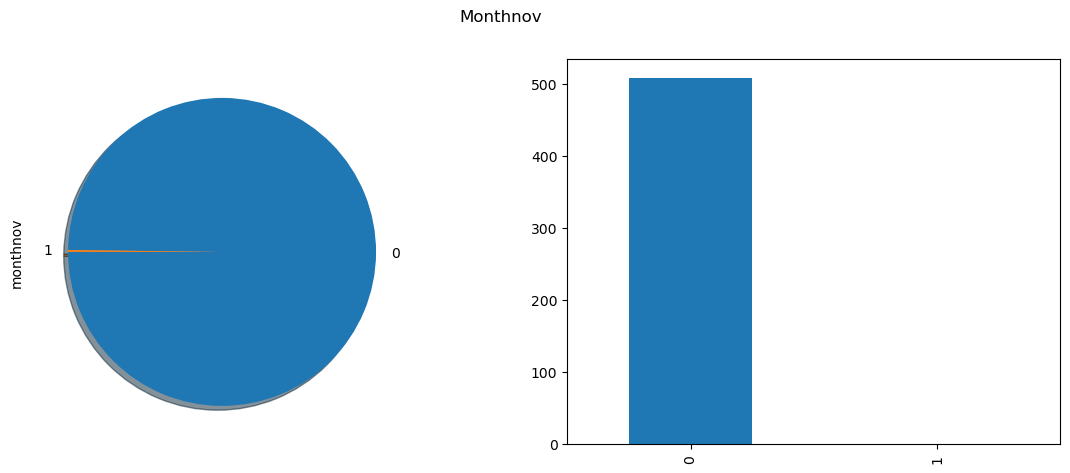

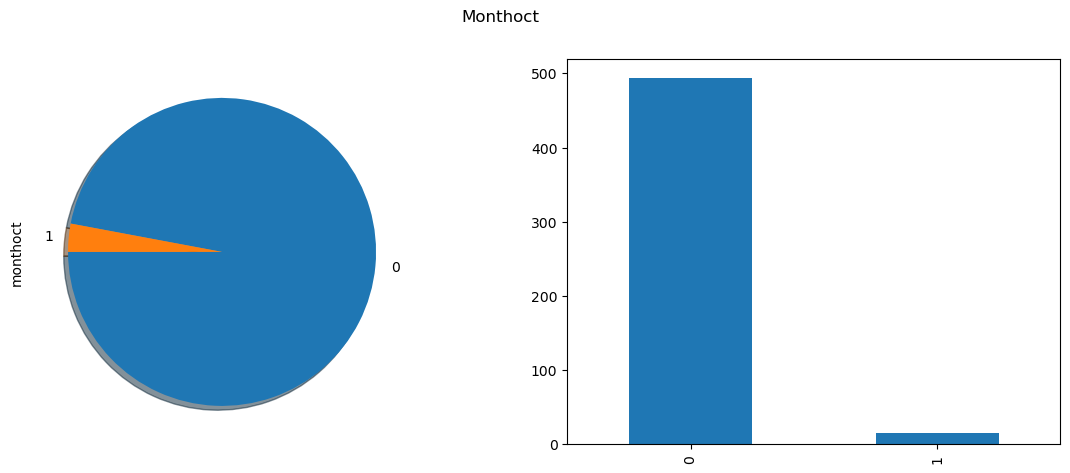

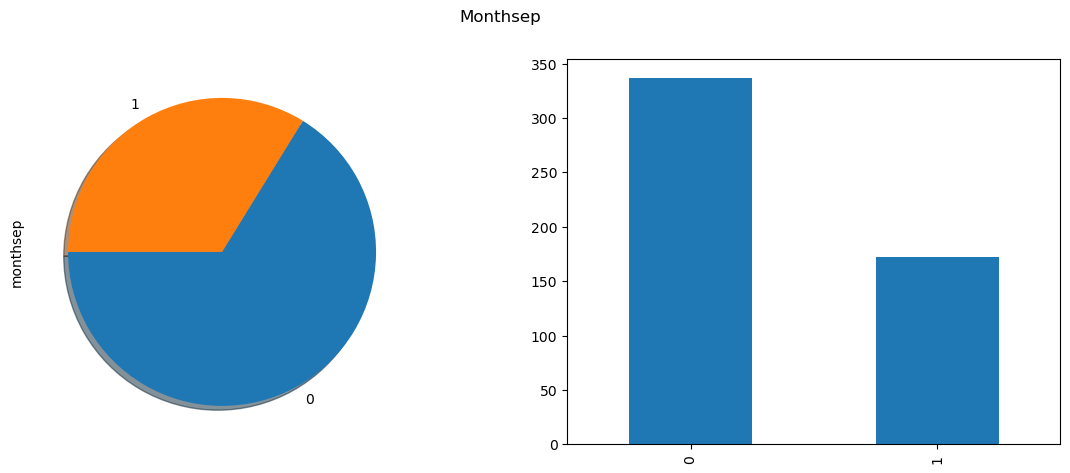

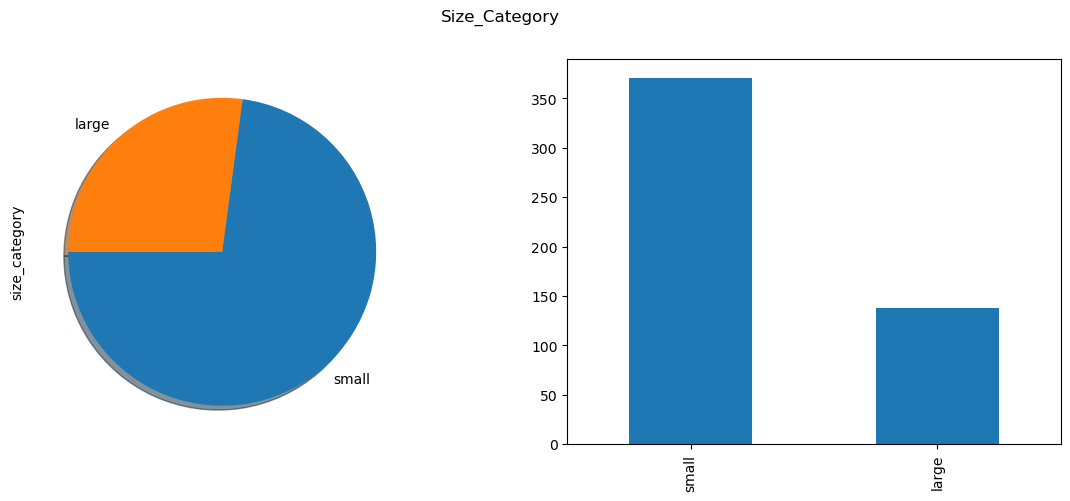

In [26]:
for i in cat_values:
    plot_categorial(i)

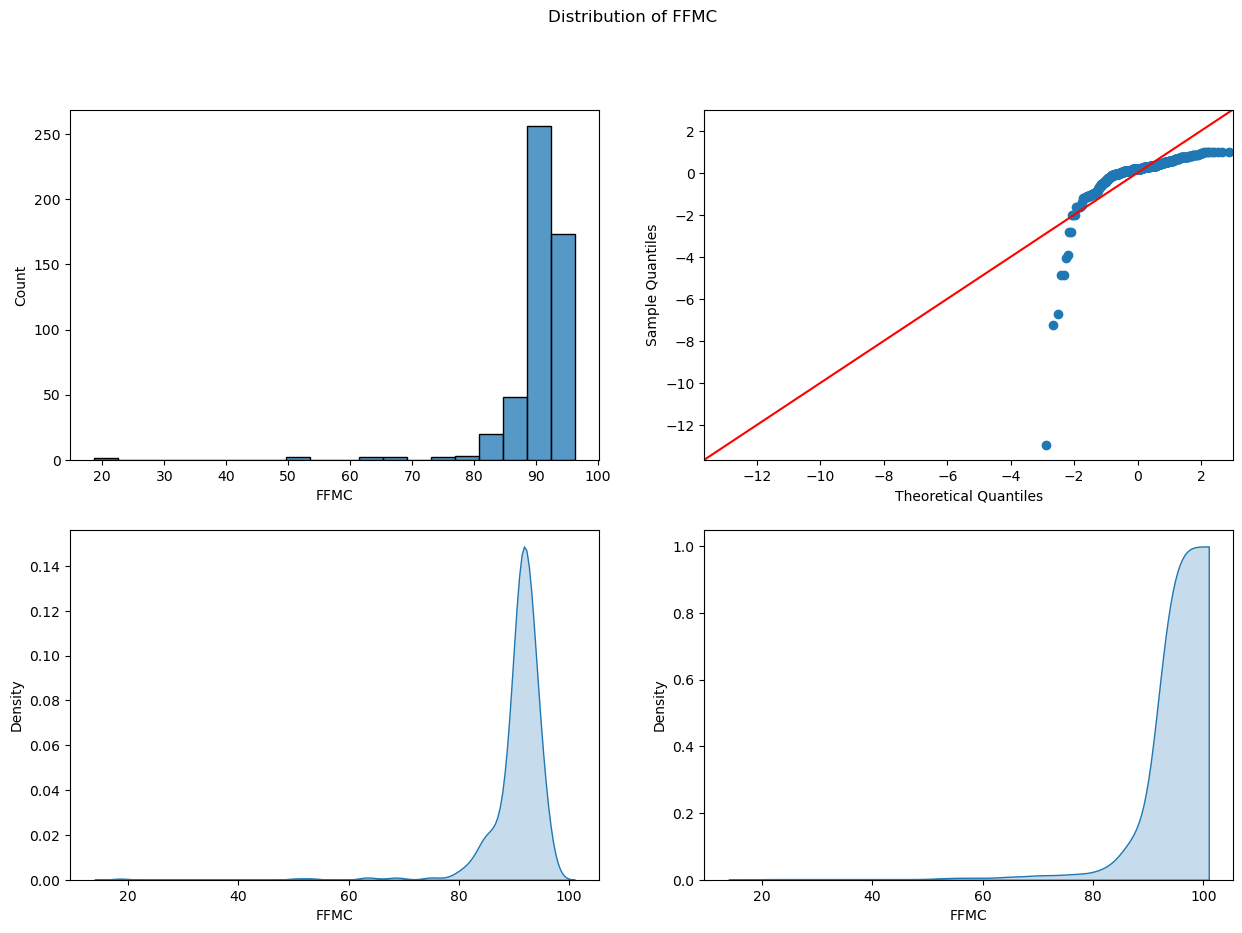

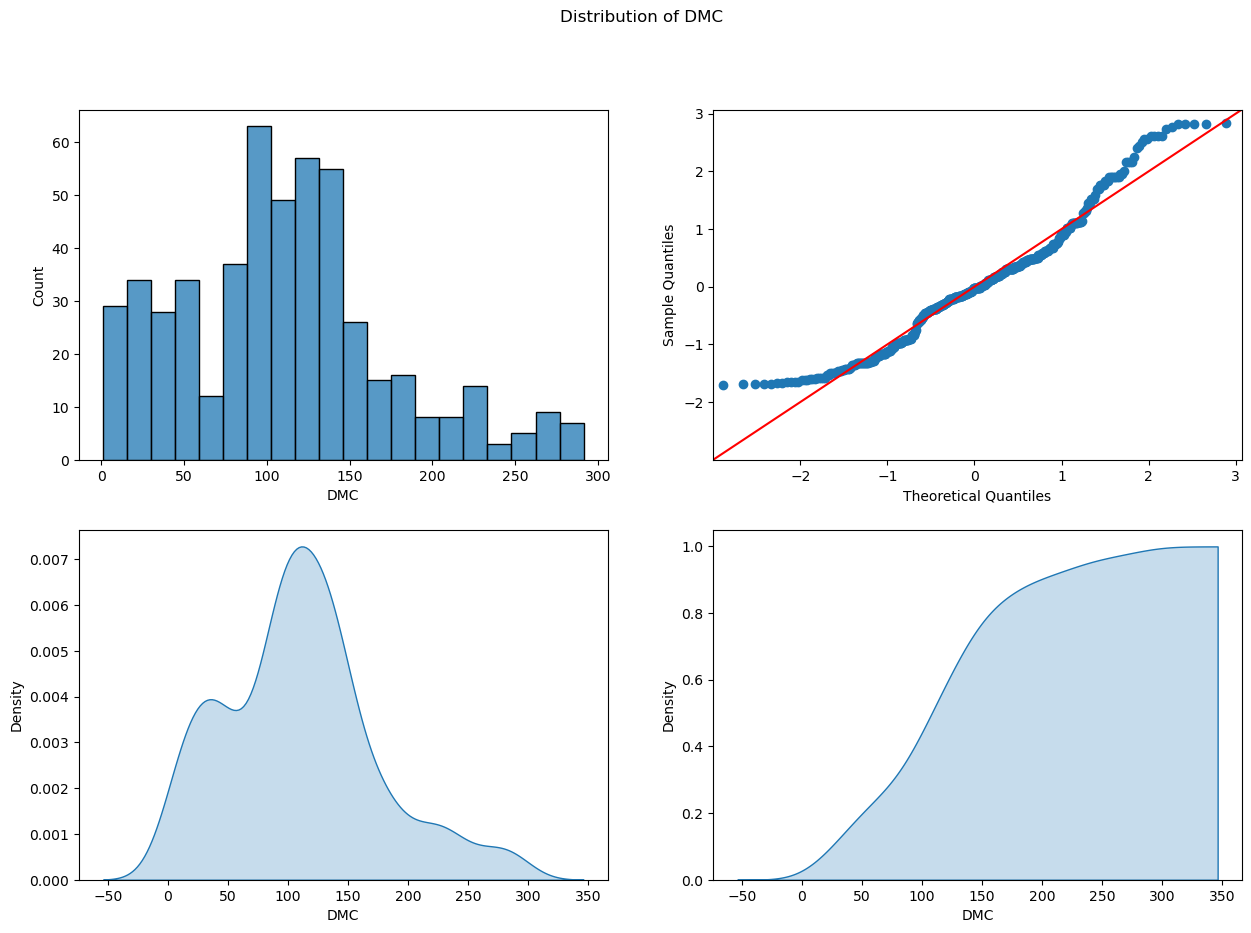

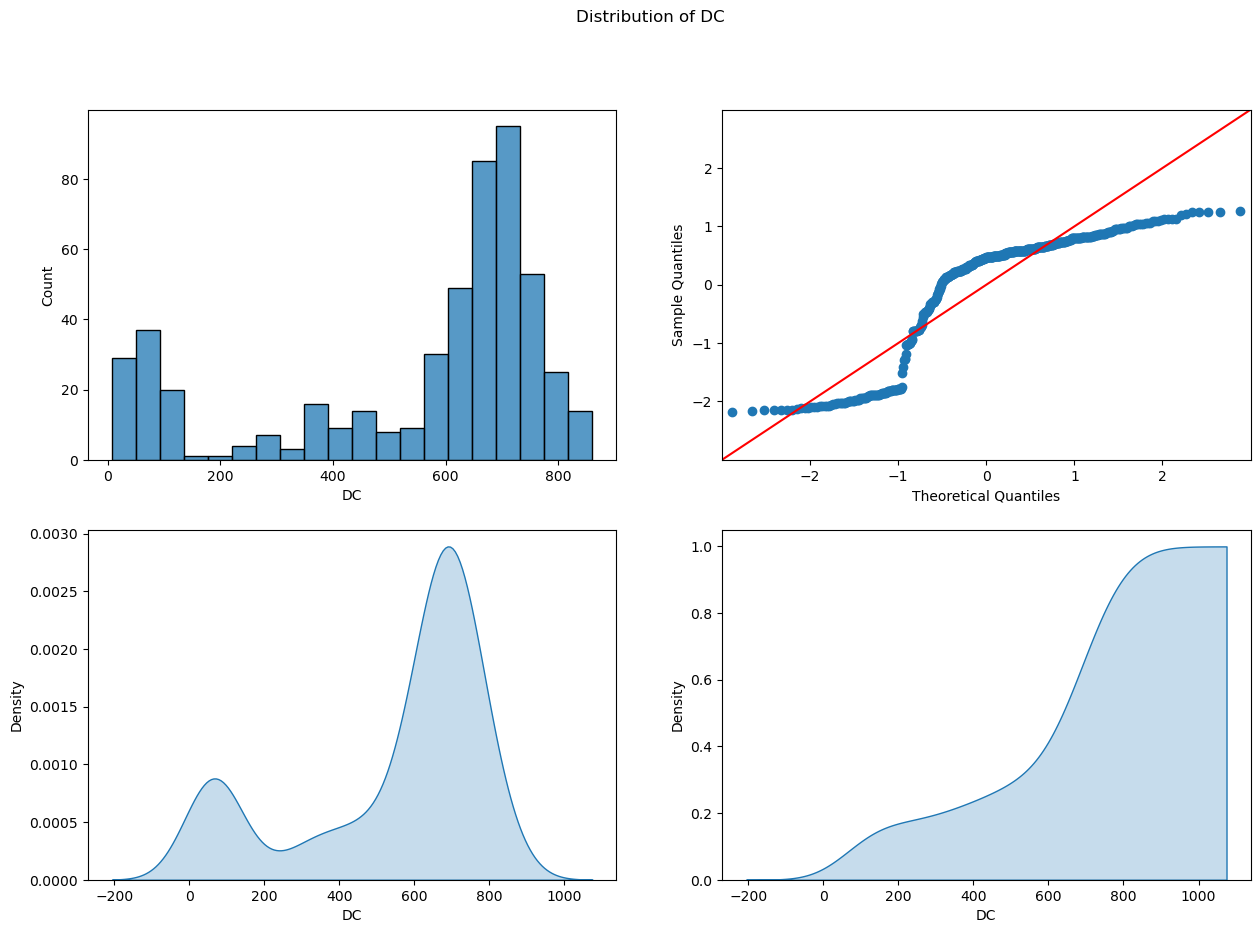

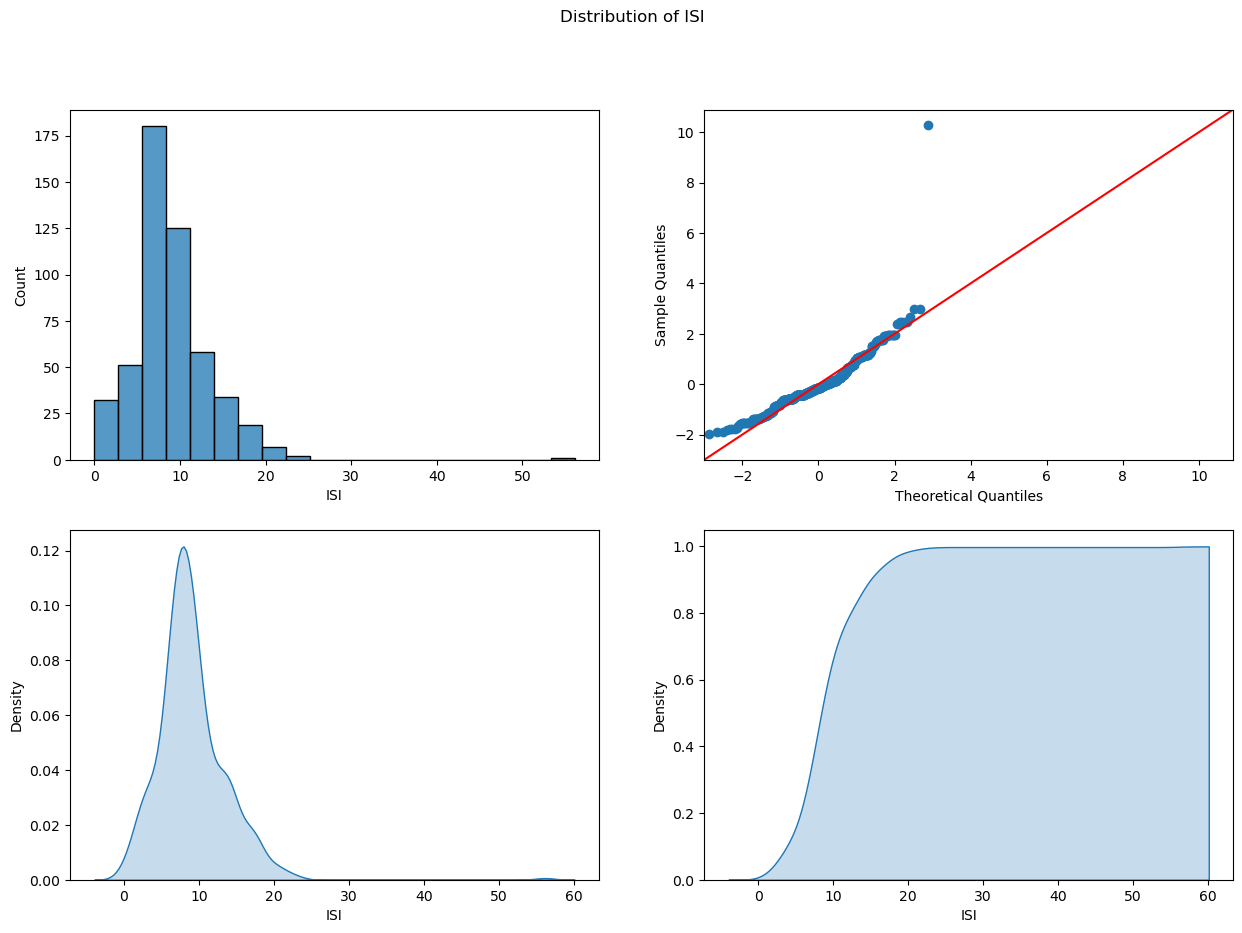

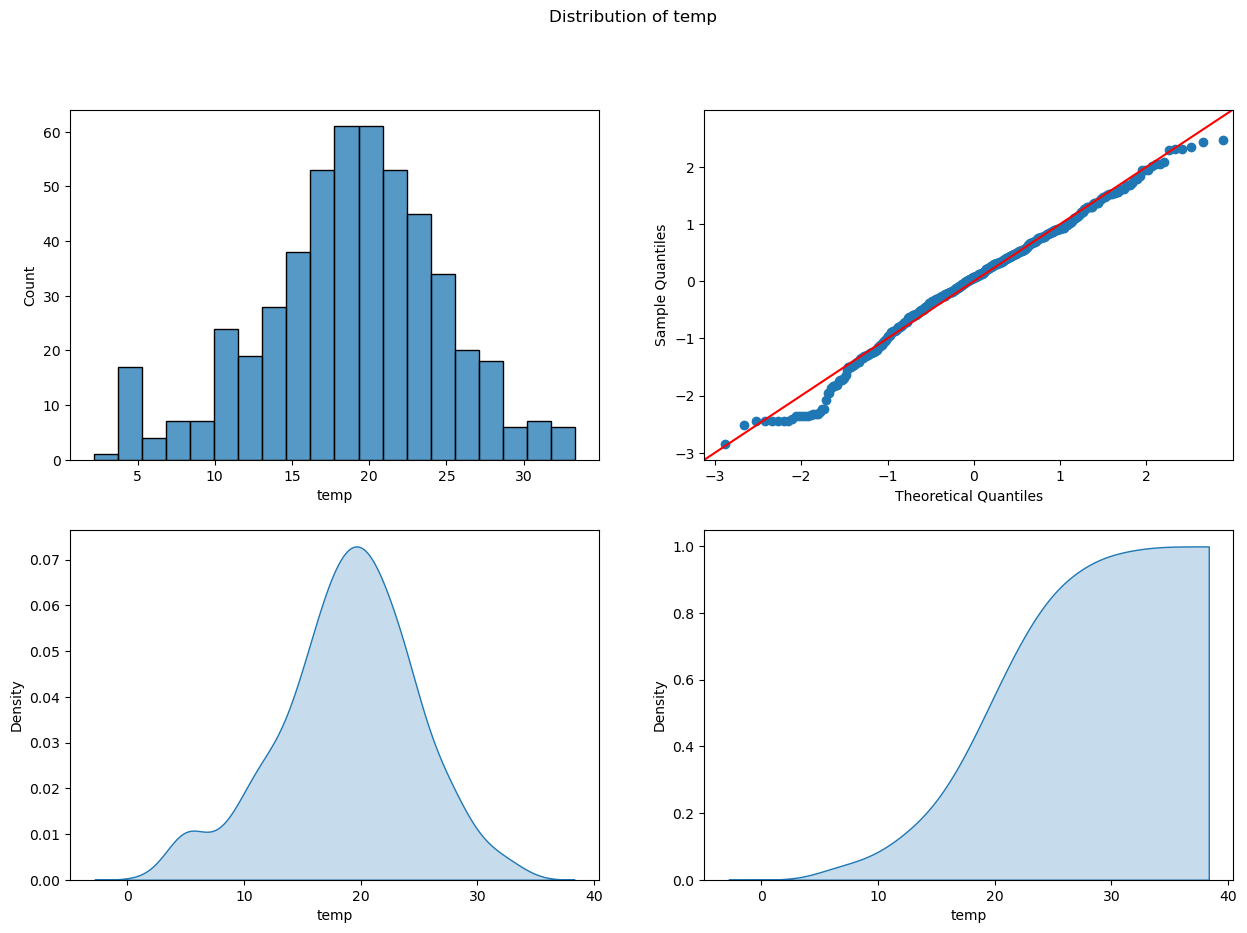

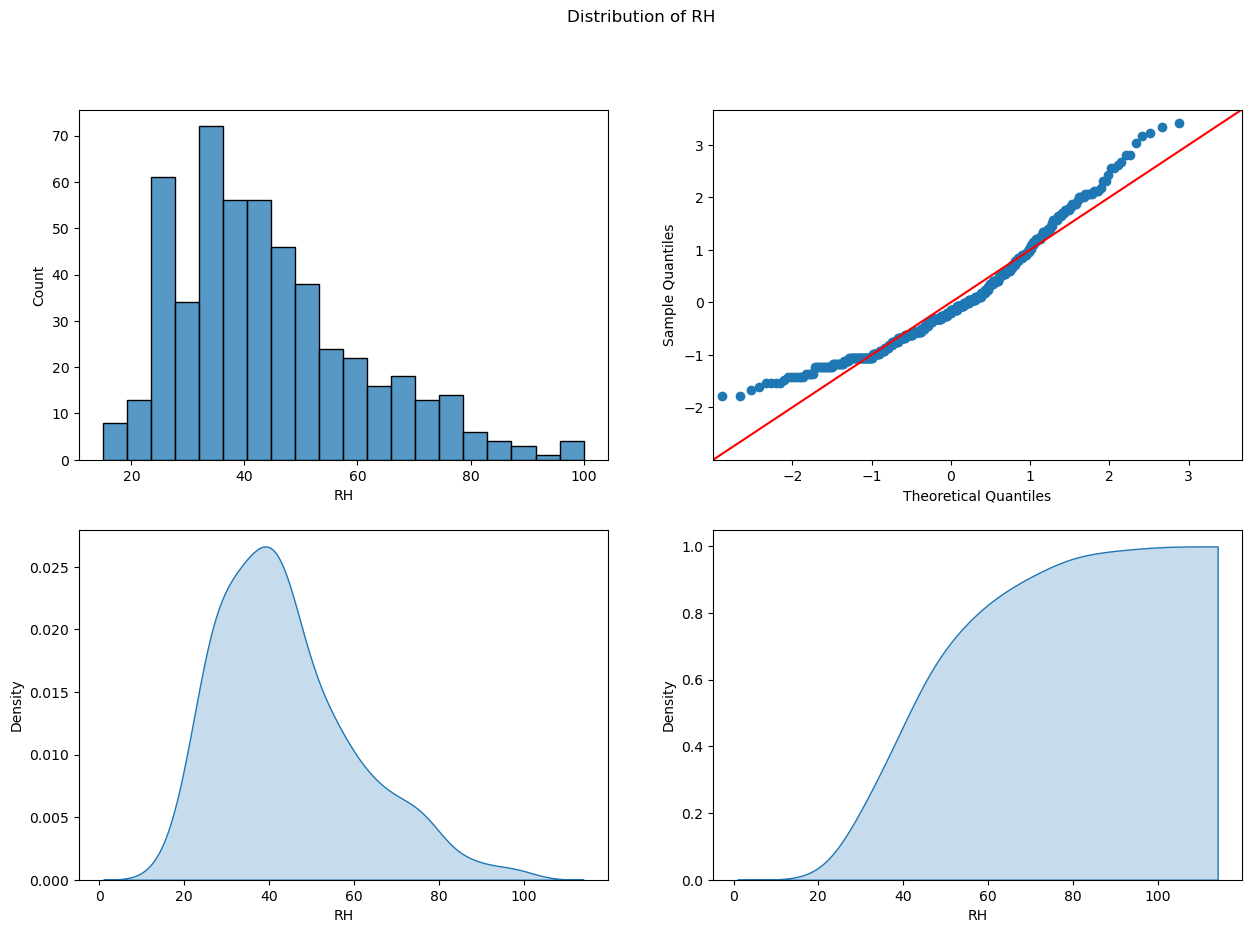

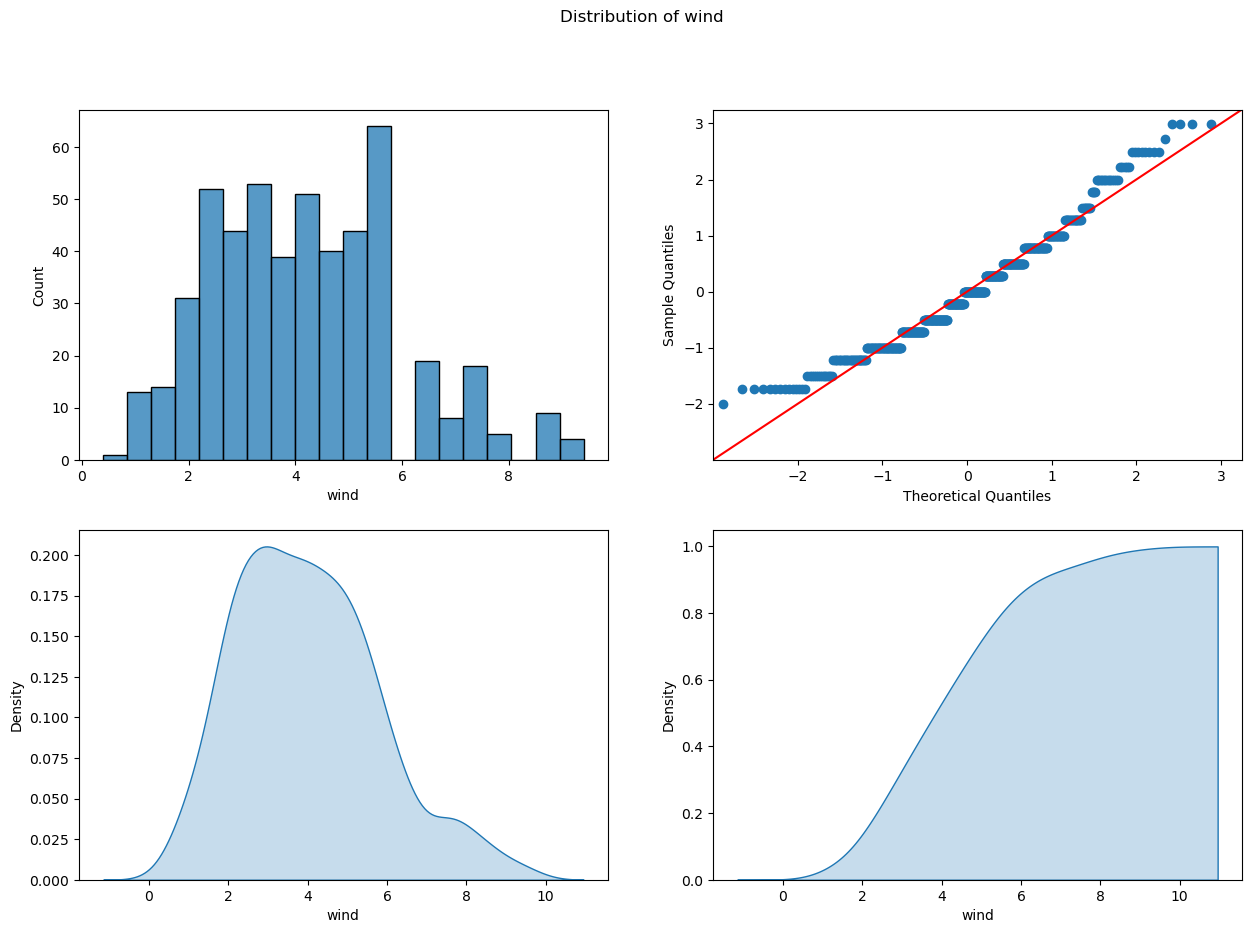

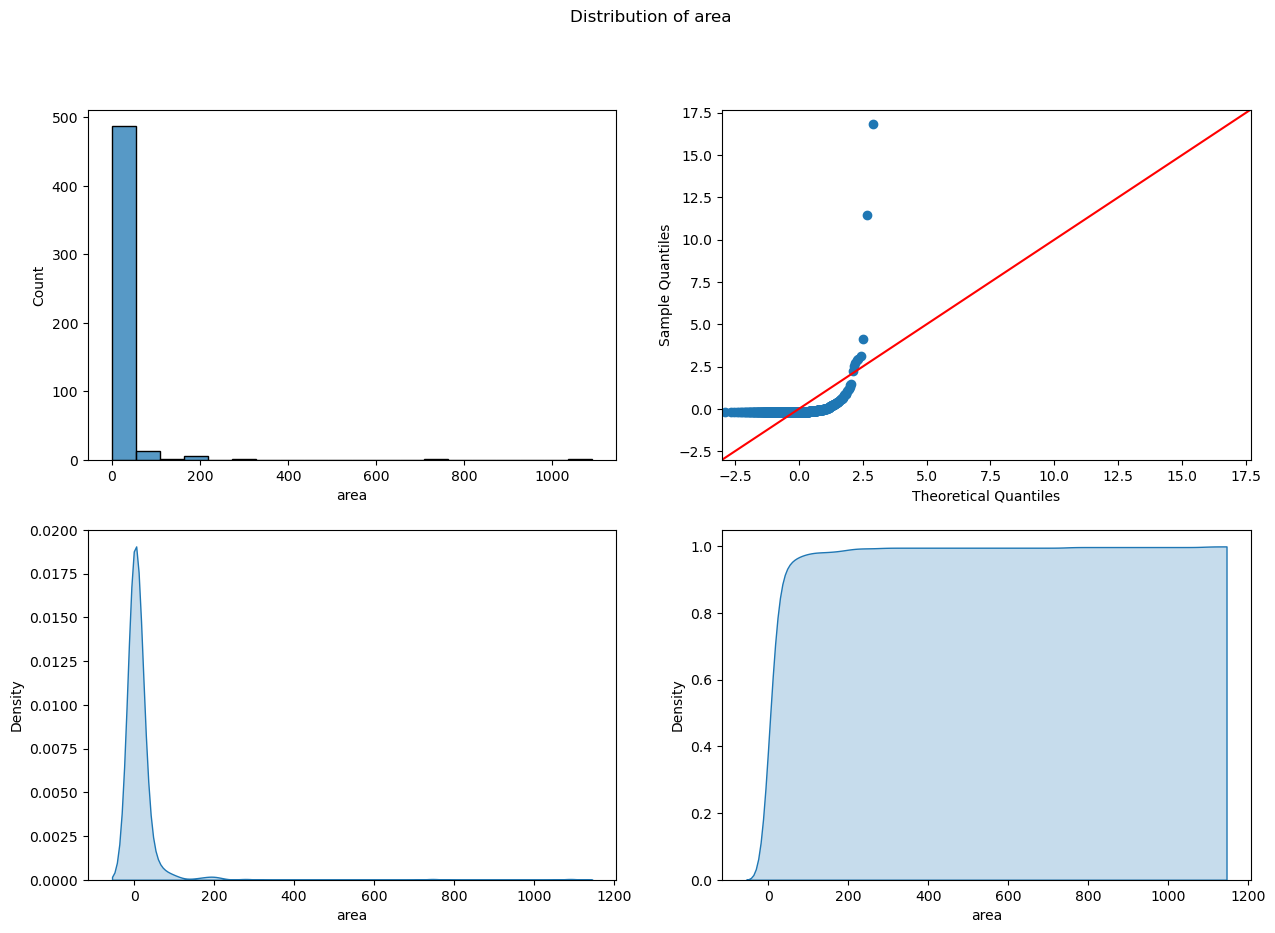

In [29]:
for i in numerical_values:
    plot_distribution(i)

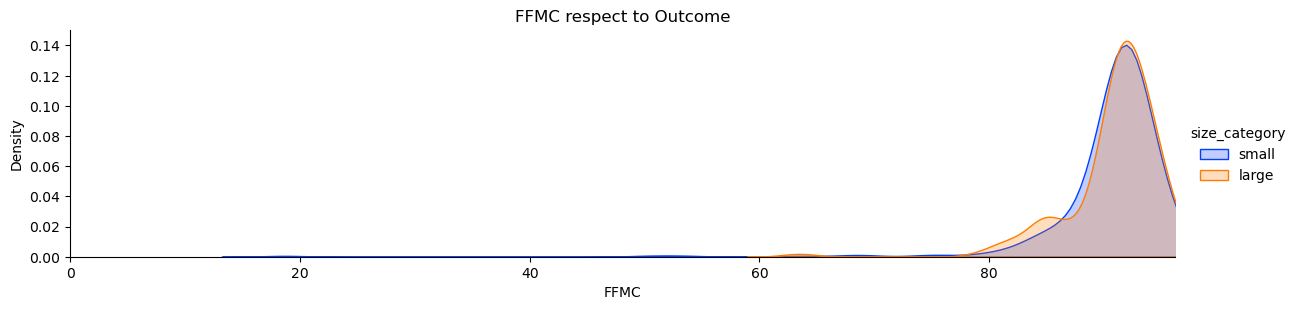

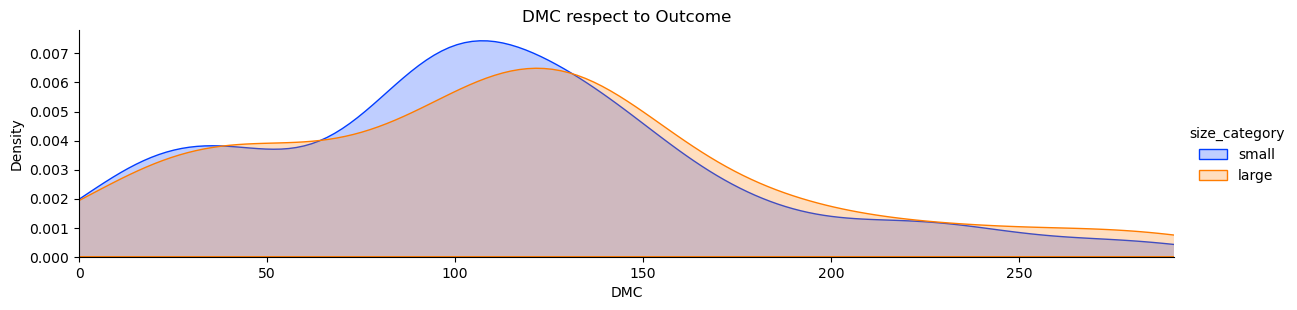

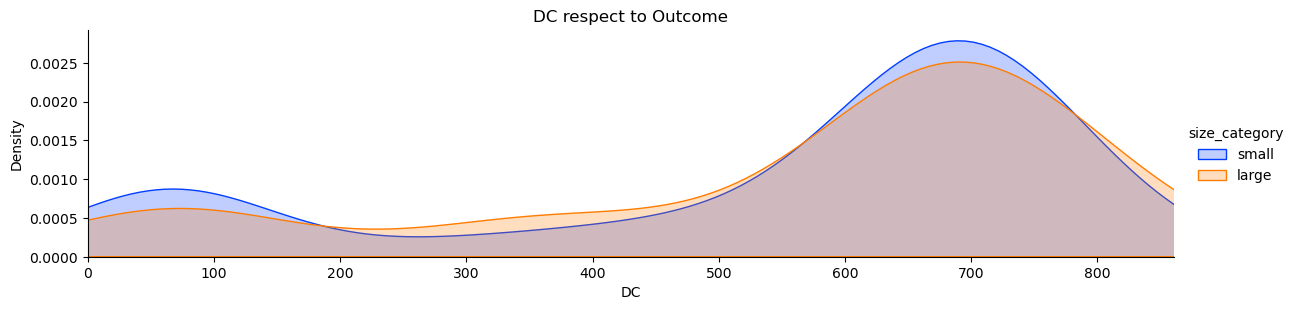

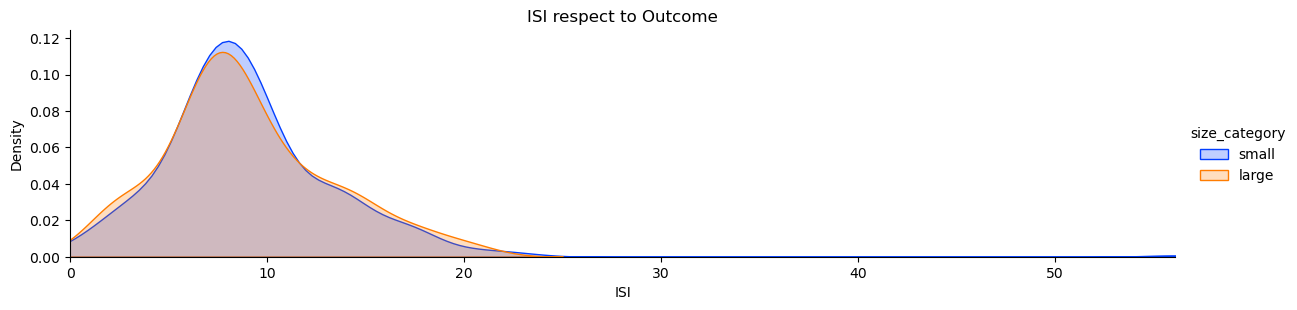

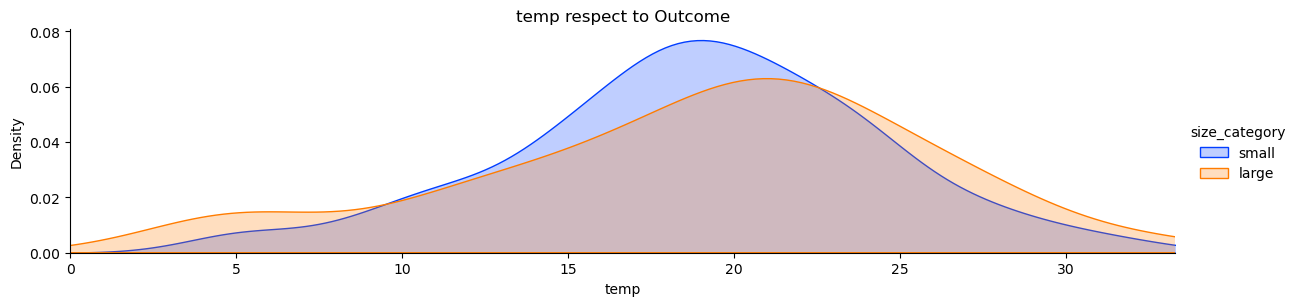

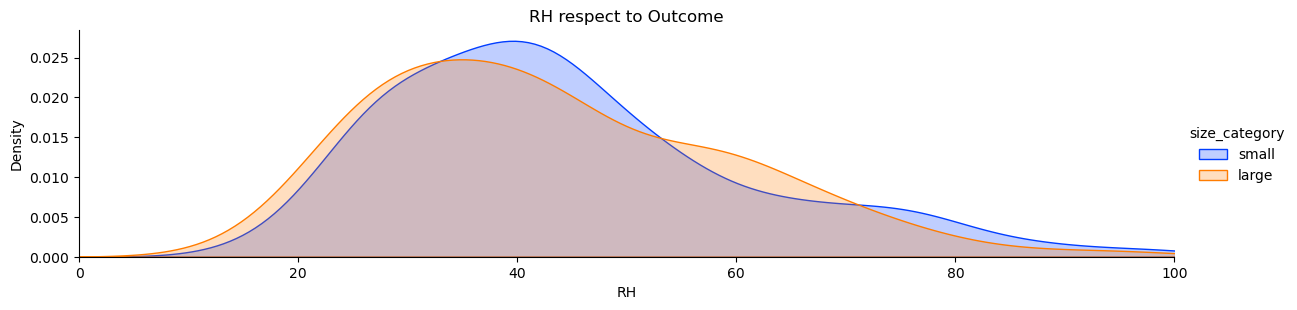

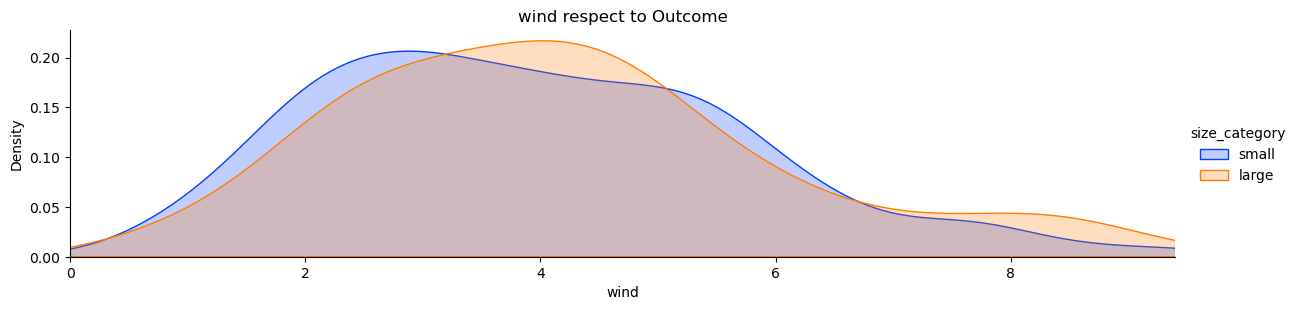

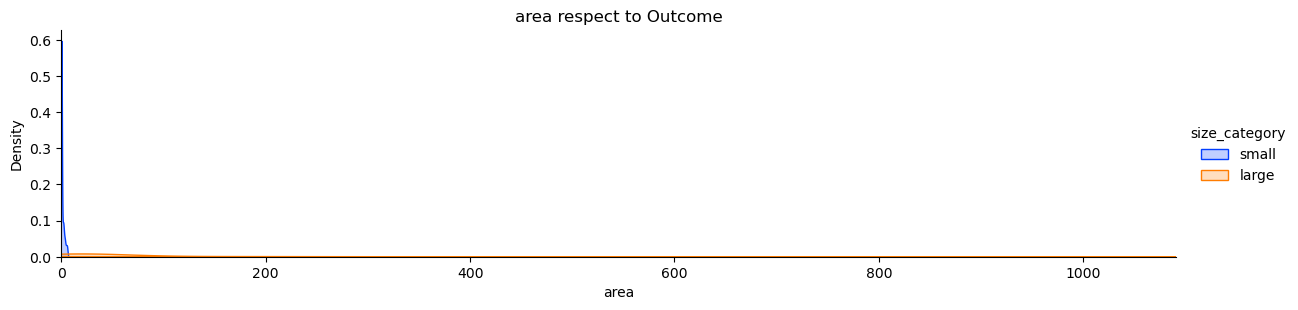

In [31]:
for i in numerical_values:
    plot_kde(i)

## checking outliers

In [53]:
df1.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,90.618075,110.235756,547.787623,9.023576,18.865422,44.253438,4.011395,0.020432,12.992908,0.163065,0.145383,0.161100,0.184676,0.117878,0.123772,0.104126,0.017682,0.349705,0.017682,0.039293,0.003929,0.062868,0.031434,0.104126,0.003929,0.001965,0.029470,0.337917
std,5.555527,63.804112,248.196222,4.585083,5.841083,16.365192,1.800926,0.296261,64.133357,0.369788,0.352833,0.367985,0.388416,0.322781,0.329645,0.305724,0.131921,0.477346,0.131921,0.194482,0.062622,0.242965,0.174660,0.305724,0.062622,0.044324,0.169285,0.473466
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,62.300000,437.700000,6.400000,15.400000,32.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.610000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,141.300000,713.900000,11.000000,22.800000,53.000000,4.900000,0.000000,6.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

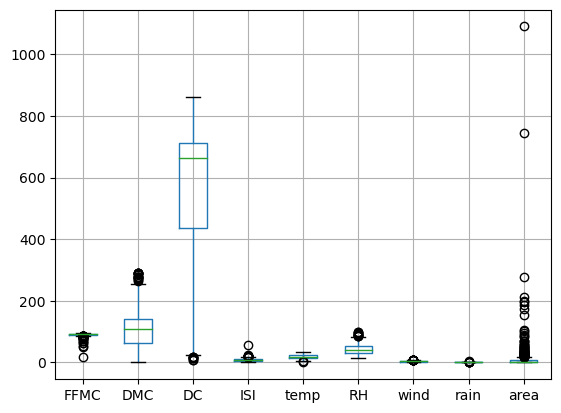

In [54]:
df1[['FFMC','DMC','DC','ISI','temp','RH','wind','rain','area']].boxplot()

In [55]:
# finding IQR value
Q1 = df1[['FFMC','DMC','DC','ISI','temp','RH','wind','rain','area']].quantile(0.25)
Q3 = df1[['FFMC','DMC','DC','ISI','temp','RH','wind','rain','area']].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

FFMC      2.70
DMC      79.00
DC      276.20
ISI       4.60
temp      7.40
RH       21.00
wind      2.20
rain      0.00
area      6.58
dtype: float64


In [56]:
df1.shape

(509, 29)

## removing outliers

In [57]:
# filtering
df2 = df1[~((df1< (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
df2.shape


(358, 29)

In [58]:
df2.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.0,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.0,358.000000,358.0,358.000000,358.000000,358.000000,358.0,358.0,358.000000,358.000000
mean,91.867318,111.443575,571.208659,9.399441,19.729330,41.807263,3.741341,0.0,2.190950,0.156425,0.148045,0.153631,0.181564,0.134078,0.120112,0.106145,0.011173,0.371508,0.0,0.008380,0.0,0.069832,0.033520,0.114525,0.0,0.0,0.030726,0.360335
std,1.882209,51.822804,226.001788,3.240483,4.893093,13.600307,1.610355,0.0,3.660088,0.363766,0.355641,0.361100,0.386024,0.341213,0.325547,0.308455,0.105258,0.483884,0.0,0.091285,0.0,0.255221,0.180241,0.318894,0.0,0.0,0.172817,0.480770
min,86.200000,13.200000,25.600000,3.700000,5.500000,15.000000,0.400000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
25%,90.925000,85.100000,522.825000,7.100000,16.600000,32.000000,2.200000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
50%,91.900000,108.400000,665.600000,8.800000,19.700000,40.000000,3.600000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
75%,92.900000,137.825000,714.900000,10.950000,23.275000,50.000000,4.900000,0.0,2.915000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000
max,96.200000,253.600000,822.800000,17.900000,32.600000,84.000000,8.000000,0.0,16.400000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000


## changing datatype of size_category

In [59]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [60]:
df2['size_category']=le.fit_transform(df2.size_category)

In [61]:
df2.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
5,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
6,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [62]:
df2.size_category.value_counts()

1    303
0     55
Name: size_category, dtype: int64

### correlation

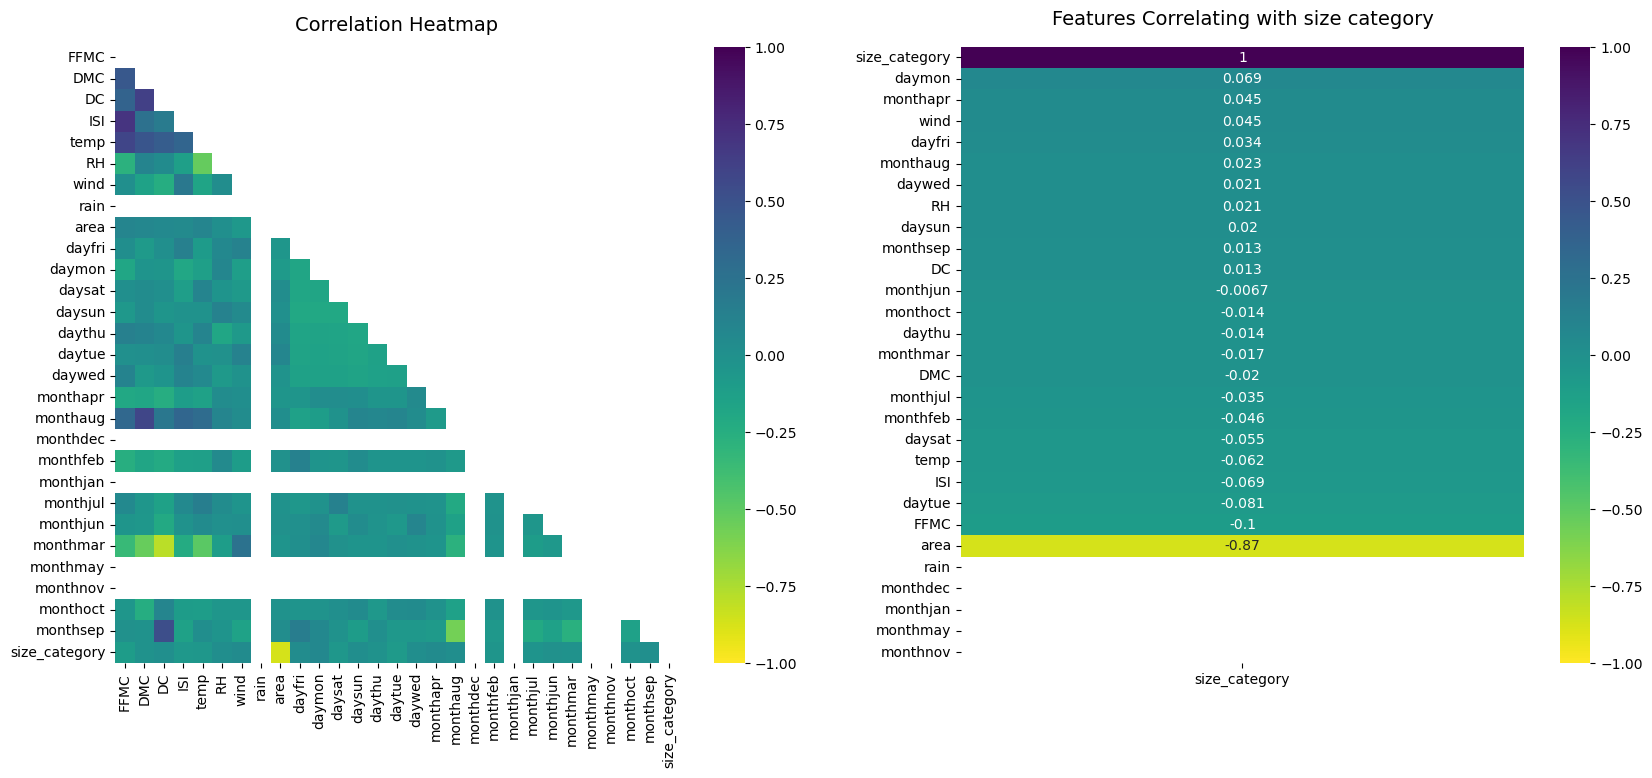

In [63]:
fig, ax = plt.subplots(ncols=2, figsize=(20, 8))  # create a 1 x 2 subplot grid
resign_corr = df2.corr()  # calculate correlation of the dataframe
mask = np.triu(np.ones_like(resign_corr, dtype=bool))
cat_heatmap = sns.heatmap(
    df2.corr(), mask=mask, vmin=-1, vmax=1, annot=False, ax=ax[0], cmap="viridis_r"
)  # cornor heatmap of the dataframe correlation
cat_heatmap.set_title(
    "Correlation Heatmap", fontdict={"fontsize": 14}, pad=12
)  # sets the title for the heatmap with font size 14 and padding 12

heatmap = sns.heatmap(
    resign_corr[["size_category"]].sort_values(by="size_category", ascending=False),
    vmin=-1,
    vmax=1,
    annot=True,
    ax=ax[1],
    cmap="viridis_r",
)  # create heatmap for features correlating with the dependant varibale 'HeartDisease'
heatmap.set_title(
    "Features Correlating with size category",
    fontdict={"fontsize": 14},
    pad=16,  # sets the title for the heatmap with font size 14 and padding 16
)
plt.show()  # shows the subplot

## Splitting the dataset into independent and dependent variable

In [64]:
df3=df2.copy()
X=df3.drop('size_category',axis=1)
X.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [65]:
y=df3['size_category']

In [66]:
y.sample(5)

296    1
442    1
373    1
436    1
333    1
Name: size_category, dtype: int32

## performing train test split

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

In [69]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(286, 28)
(286,)
(72, 28)
(72,)



## standardization

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

## model building

In [72]:
from sklearn import svm

In [73]:
model=svm.SVC()

In [74]:
model.fit(X_train,y_train)

SVC()

## checking accuracy

In [75]:
model.score(X_test,y_test)

0.9583333333333334

## grid search for finding best parameter

In [76]:
param_grid = [{'kernel':['linear','rbf','sigmoid','poly'],'gamma':[0.1, 0.01, 0.001] ,'C':[0.1, 1, 10, 100] ,'degree': [2, 3, 4] }]

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
Gvc=GridSearchCV(model,param_grid,cv=10,verbose=100,n_jobs=1)

In [80]:
Gvc.fit(X_train,y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits
[CV 1/10; 1/144] START C=0.1, degree=2, gamma=0.1, kernel=linear................
[CV 1/10; 1/144] END C=0.1, degree=2, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/10; 1/144] START C=0.1, degree=2, gamma=0.1, kernel=linear................
[CV 2/10; 1/144] END C=0.1, degree=2, gamma=0.1, kernel=linear;, score=0.966 total time=   0.0s
[CV 3/10; 1/144] START C=0.1, degree=2, gamma=0.1, kernel=linear................
[CV 3/10; 1/144] END C=0.1, degree=2, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/10; 1/144] START C=0.1, degree=2, gamma=0.1, kernel=linear................
[CV 4/10; 1/144] END C=0.1, degree=2, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/10; 1/144] START C=0.1, degree=2, gamma=0.1, kernel=linear................
[CV 5/10; 1/144] END C=0.1, degree=2, gamma=0.1, kernel=linear;, score=0.966 total time=   0.0s
[CV 6/10; 1/144] START C=0.1, degree=2, gamma=0.1,

[CV 4/10; 6/144] END C=0.1, degree=2, gamma=0.01, kernel=rbf;, score=0.828 total time=   0.0s
[CV 5/10; 6/144] START C=0.1, degree=2, gamma=0.01, kernel=rbf..................
[CV 5/10; 6/144] END C=0.1, degree=2, gamma=0.01, kernel=rbf;, score=0.828 total time=   0.0s
[CV 6/10; 6/144] START C=0.1, degree=2, gamma=0.01, kernel=rbf..................
[CV 6/10; 6/144] END C=0.1, degree=2, gamma=0.01, kernel=rbf;, score=0.828 total time=   0.0s
[CV 7/10; 6/144] START C=0.1, degree=2, gamma=0.01, kernel=rbf..................
[CV 7/10; 6/144] END C=0.1, degree=2, gamma=0.01, kernel=rbf;, score=0.857 total time=   0.0s
[CV 8/10; 6/144] START C=0.1, degree=2, gamma=0.01, kernel=rbf..................
[CV 8/10; 6/144] END C=0.1, degree=2, gamma=0.01, kernel=rbf;, score=0.857 total time=   0.0s
[CV 9/10; 6/144] START C=0.1, degree=2, gamma=0.01, kernel=rbf..................
[CV 9/10; 6/144] END C=0.1, degree=2, gamma=0.01, kernel=rbf;, score=0.857 total time=   0.0s
[CV 10/10; 6/144] START C=0.1, 

[CV 9/10; 11/144] END C=0.1, degree=2, gamma=0.001, kernel=sigmoid;, score=0.857 total time=   0.0s
[CV 10/10; 11/144] START C=0.1, degree=2, gamma=0.001, kernel=sigmoid...........
[CV 10/10; 11/144] END C=0.1, degree=2, gamma=0.001, kernel=sigmoid;, score=0.857 total time=   0.0s
[CV 1/10; 12/144] START C=0.1, degree=2, gamma=0.001, kernel=poly...............
[CV 1/10; 12/144] END C=0.1, degree=2, gamma=0.001, kernel=poly;, score=0.828 total time=   0.0s
[CV 2/10; 12/144] START C=0.1, degree=2, gamma=0.001, kernel=poly...............
[CV 2/10; 12/144] END C=0.1, degree=2, gamma=0.001, kernel=poly;, score=0.828 total time=   0.0s
[CV 3/10; 12/144] START C=0.1, degree=2, gamma=0.001, kernel=poly...............
[CV 3/10; 12/144] END C=0.1, degree=2, gamma=0.001, kernel=poly;, score=0.828 total time=   0.0s
[CV 4/10; 12/144] START C=0.1, degree=2, gamma=0.001, kernel=poly...............
[CV 4/10; 12/144] END C=0.1, degree=2, gamma=0.001, kernel=poly;, score=0.828 total time=   0.0s
[CV 5/

[CV 6/10; 17/144] END C=0.1, degree=3, gamma=0.01, kernel=linear;, score=0.931 total time=   0.0s
[CV 7/10; 17/144] START C=0.1, degree=3, gamma=0.01, kernel=linear..............
[CV 7/10; 17/144] END C=0.1, degree=3, gamma=0.01, kernel=linear;, score=0.964 total time=   0.0s
[CV 8/10; 17/144] START C=0.1, degree=3, gamma=0.01, kernel=linear..............
[CV 8/10; 17/144] END C=0.1, degree=3, gamma=0.01, kernel=linear;, score=1.000 total time=   0.0s
[CV 9/10; 17/144] START C=0.1, degree=3, gamma=0.01, kernel=linear..............
[CV 9/10; 17/144] END C=0.1, degree=3, gamma=0.01, kernel=linear;, score=1.000 total time=   0.0s
[CV 10/10; 17/144] START C=0.1, degree=3, gamma=0.01, kernel=linear.............
[CV 10/10; 17/144] END C=0.1, degree=3, gamma=0.01, kernel=linear;, score=0.964 total time=   0.0s
[CV 1/10; 18/144] START C=0.1, degree=3, gamma=0.01, kernel=rbf.................
[CV 1/10; 18/144] END C=0.1, degree=3, gamma=0.01, kernel=rbf;, score=0.828 total time=   0.0s
[CV 2/10;

[CV 1/10; 23/144] END C=0.1, degree=3, gamma=0.001, kernel=sigmoid;, score=0.828 total time=   0.0s
[CV 2/10; 23/144] START C=0.1, degree=3, gamma=0.001, kernel=sigmoid............
[CV 2/10; 23/144] END C=0.1, degree=3, gamma=0.001, kernel=sigmoid;, score=0.828 total time=   0.0s
[CV 3/10; 23/144] START C=0.1, degree=3, gamma=0.001, kernel=sigmoid............
[CV 3/10; 23/144] END C=0.1, degree=3, gamma=0.001, kernel=sigmoid;, score=0.828 total time=   0.0s
[CV 4/10; 23/144] START C=0.1, degree=3, gamma=0.001, kernel=sigmoid............
[CV 4/10; 23/144] END C=0.1, degree=3, gamma=0.001, kernel=sigmoid;, score=0.828 total time=   0.0s
[CV 5/10; 23/144] START C=0.1, degree=3, gamma=0.001, kernel=sigmoid............
[CV 5/10; 23/144] END C=0.1, degree=3, gamma=0.001, kernel=sigmoid;, score=0.828 total time=   0.0s
[CV 6/10; 23/144] START C=0.1, degree=3, gamma=0.001, kernel=sigmoid............
[CV 6/10; 23/144] END C=0.1, degree=3, gamma=0.001, kernel=sigmoid;, score=0.828 total time=   

[CV 3/10; 28/144] END C=0.1, degree=4, gamma=0.1, kernel=poly;, score=0.862 total time=   0.0s
[CV 4/10; 28/144] START C=0.1, degree=4, gamma=0.1, kernel=poly.................
[CV 4/10; 28/144] END C=0.1, degree=4, gamma=0.1, kernel=poly;, score=0.897 total time=   0.0s
[CV 5/10; 28/144] START C=0.1, degree=4, gamma=0.1, kernel=poly.................
[CV 5/10; 28/144] END C=0.1, degree=4, gamma=0.1, kernel=poly;, score=0.828 total time=   0.0s
[CV 6/10; 28/144] START C=0.1, degree=4, gamma=0.1, kernel=poly.................
[CV 6/10; 28/144] END C=0.1, degree=4, gamma=0.1, kernel=poly;, score=0.931 total time=   0.0s
[CV 7/10; 28/144] START C=0.1, degree=4, gamma=0.1, kernel=poly.................
[CV 7/10; 28/144] END C=0.1, degree=4, gamma=0.1, kernel=poly;, score=0.929 total time=   0.0s
[CV 8/10; 28/144] START C=0.1, degree=4, gamma=0.1, kernel=poly.................
[CV 8/10; 28/144] END C=0.1, degree=4, gamma=0.1, kernel=poly;, score=0.857 total time=   0.0s
[CV 9/10; 28/144] START C

[CV 4/10; 34/144] END C=0.1, degree=4, gamma=0.001, kernel=rbf;, score=0.828 total time=   0.0s
[CV 5/10; 34/144] START C=0.1, degree=4, gamma=0.001, kernel=rbf................
[CV 5/10; 34/144] END C=0.1, degree=4, gamma=0.001, kernel=rbf;, score=0.828 total time=   0.0s
[CV 6/10; 34/144] START C=0.1, degree=4, gamma=0.001, kernel=rbf................
[CV 6/10; 34/144] END C=0.1, degree=4, gamma=0.001, kernel=rbf;, score=0.828 total time=   0.0s
[CV 7/10; 34/144] START C=0.1, degree=4, gamma=0.001, kernel=rbf................
[CV 7/10; 34/144] END C=0.1, degree=4, gamma=0.001, kernel=rbf;, score=0.857 total time=   0.0s
[CV 8/10; 34/144] START C=0.1, degree=4, gamma=0.001, kernel=rbf................
[CV 8/10; 34/144] END C=0.1, degree=4, gamma=0.001, kernel=rbf;, score=0.857 total time=   0.0s
[CV 9/10; 34/144] START C=0.1, degree=4, gamma=0.001, kernel=rbf................
[CV 9/10; 34/144] END C=0.1, degree=4, gamma=0.001, kernel=rbf;, score=0.857 total time=   0.0s
[CV 10/10; 34/144] 

[CV 2/10; 40/144] END C=1, degree=2, gamma=0.1, kernel=poly;, score=0.862 total time=   0.0s
[CV 3/10; 40/144] START C=1, degree=2, gamma=0.1, kernel=poly...................
[CV 3/10; 40/144] END C=1, degree=2, gamma=0.1, kernel=poly;, score=0.931 total time=   0.0s
[CV 4/10; 40/144] START C=1, degree=2, gamma=0.1, kernel=poly...................
[CV 4/10; 40/144] END C=1, degree=2, gamma=0.1, kernel=poly;, score=0.966 total time=   0.0s
[CV 5/10; 40/144] START C=1, degree=2, gamma=0.1, kernel=poly...................
[CV 5/10; 40/144] END C=1, degree=2, gamma=0.1, kernel=poly;, score=0.862 total time=   0.0s
[CV 6/10; 40/144] START C=1, degree=2, gamma=0.1, kernel=poly...................
[CV 6/10; 40/144] END C=1, degree=2, gamma=0.1, kernel=poly;, score=0.931 total time=   0.0s
[CV 7/10; 40/144] START C=1, degree=2, gamma=0.1, kernel=poly...................
[CV 7/10; 40/144] END C=1, degree=2, gamma=0.1, kernel=poly;, score=0.964 total time=   0.0s
[CV 8/10; 40/144] START C=1, degree=2

[CV 2/10; 46/144] END C=1, degree=2, gamma=0.001, kernel=rbf;, score=0.828 total time=   0.0s
[CV 3/10; 46/144] START C=1, degree=2, gamma=0.001, kernel=rbf..................
[CV 3/10; 46/144] END C=1, degree=2, gamma=0.001, kernel=rbf;, score=0.828 total time=   0.0s
[CV 4/10; 46/144] START C=1, degree=2, gamma=0.001, kernel=rbf..................
[CV 4/10; 46/144] END C=1, degree=2, gamma=0.001, kernel=rbf;, score=0.828 total time=   0.0s
[CV 5/10; 46/144] START C=1, degree=2, gamma=0.001, kernel=rbf..................
[CV 5/10; 46/144] END C=1, degree=2, gamma=0.001, kernel=rbf;, score=0.828 total time=   0.0s
[CV 6/10; 46/144] START C=1, degree=2, gamma=0.001, kernel=rbf..................
[CV 6/10; 46/144] END C=1, degree=2, gamma=0.001, kernel=rbf;, score=0.828 total time=   0.0s
[CV 7/10; 46/144] START C=1, degree=2, gamma=0.001, kernel=rbf..................
[CV 7/10; 46/144] END C=1, degree=2, gamma=0.001, kernel=rbf;, score=0.857 total time=   0.0s
[CV 8/10; 46/144] START C=1, de

[CV 9/10; 51/144] END C=1, degree=3, gamma=0.1, kernel=sigmoid;, score=1.000 total time=   0.0s
[CV 10/10; 51/144] START C=1, degree=3, gamma=0.1, kernel=sigmoid...............
[CV 10/10; 51/144] END C=1, degree=3, gamma=0.1, kernel=sigmoid;, score=0.929 total time=   0.0s
[CV 1/10; 52/144] START C=1, degree=3, gamma=0.1, kernel=poly...................
[CV 1/10; 52/144] END C=1, degree=3, gamma=0.1, kernel=poly;, score=0.897 total time=   0.0s
[CV 2/10; 52/144] START C=1, degree=3, gamma=0.1, kernel=poly...................
[CV 2/10; 52/144] END C=1, degree=3, gamma=0.1, kernel=poly;, score=0.931 total time=   0.0s
[CV 3/10; 52/144] START C=1, degree=3, gamma=0.1, kernel=poly...................
[CV 3/10; 52/144] END C=1, degree=3, gamma=0.1, kernel=poly;, score=0.897 total time=   0.0s
[CV 4/10; 52/144] START C=1, degree=3, gamma=0.1, kernel=poly...................
[CV 4/10; 52/144] END C=1, degree=3, gamma=0.1, kernel=poly;, score=0.931 total time=   0.0s
[CV 5/10; 52/144] START C=1, d

[CV 2/10; 58/144] END C=1, degree=3, gamma=0.001, kernel=rbf;, score=0.828 total time=   0.0s
[CV 3/10; 58/144] START C=1, degree=3, gamma=0.001, kernel=rbf..................
[CV 3/10; 58/144] END C=1, degree=3, gamma=0.001, kernel=rbf;, score=0.828 total time=   0.0s
[CV 4/10; 58/144] START C=1, degree=3, gamma=0.001, kernel=rbf..................
[CV 4/10; 58/144] END C=1, degree=3, gamma=0.001, kernel=rbf;, score=0.828 total time=   0.0s
[CV 5/10; 58/144] START C=1, degree=3, gamma=0.001, kernel=rbf..................
[CV 5/10; 58/144] END C=1, degree=3, gamma=0.001, kernel=rbf;, score=0.828 total time=   0.0s
[CV 6/10; 58/144] START C=1, degree=3, gamma=0.001, kernel=rbf..................
[CV 6/10; 58/144] END C=1, degree=3, gamma=0.001, kernel=rbf;, score=0.828 total time=   0.0s
[CV 7/10; 58/144] START C=1, degree=3, gamma=0.001, kernel=rbf..................
[CV 7/10; 58/144] END C=1, degree=3, gamma=0.001, kernel=rbf;, score=0.857 total time=   0.0s
[CV 8/10; 58/144] START C=1, de

[CV 10/10; 63/144] END C=1, degree=4, gamma=0.1, kernel=sigmoid;, score=0.929 total time=   0.0s
[CV 1/10; 64/144] START C=1, degree=4, gamma=0.1, kernel=poly...................
[CV 1/10; 64/144] END C=1, degree=4, gamma=0.1, kernel=poly;, score=0.897 total time=   0.0s
[CV 2/10; 64/144] START C=1, degree=4, gamma=0.1, kernel=poly...................
[CV 2/10; 64/144] END C=1, degree=4, gamma=0.1, kernel=poly;, score=0.828 total time=   0.0s
[CV 3/10; 64/144] START C=1, degree=4, gamma=0.1, kernel=poly...................
[CV 3/10; 64/144] END C=1, degree=4, gamma=0.1, kernel=poly;, score=0.862 total time=   0.0s
[CV 4/10; 64/144] START C=1, degree=4, gamma=0.1, kernel=poly...................
[CV 4/10; 64/144] END C=1, degree=4, gamma=0.1, kernel=poly;, score=0.897 total time=   0.0s
[CV 5/10; 64/144] START C=1, degree=4, gamma=0.1, kernel=poly...................
[CV 5/10; 64/144] END C=1, degree=4, gamma=0.1, kernel=poly;, score=0.897 total time=   0.0s
[CV 6/10; 64/144] START C=1, degr

[CV 9/10; 69/144] END C=1, degree=4, gamma=0.001, kernel=linear;, score=1.000 total time=   0.0s
[CV 10/10; 69/144] START C=1, degree=4, gamma=0.001, kernel=linear..............
[CV 10/10; 69/144] END C=1, degree=4, gamma=0.001, kernel=linear;, score=0.964 total time=   0.0s
[CV 1/10; 70/144] START C=1, degree=4, gamma=0.001, kernel=rbf..................
[CV 1/10; 70/144] END C=1, degree=4, gamma=0.001, kernel=rbf;, score=0.828 total time=   0.0s
[CV 2/10; 70/144] START C=1, degree=4, gamma=0.001, kernel=rbf..................
[CV 2/10; 70/144] END C=1, degree=4, gamma=0.001, kernel=rbf;, score=0.828 total time=   0.0s
[CV 3/10; 70/144] START C=1, degree=4, gamma=0.001, kernel=rbf..................
[CV 3/10; 70/144] END C=1, degree=4, gamma=0.001, kernel=rbf;, score=0.828 total time=   0.0s
[CV 4/10; 70/144] START C=1, degree=4, gamma=0.001, kernel=rbf..................
[CV 4/10; 70/144] END C=1, degree=4, gamma=0.001, kernel=rbf;, score=0.828 total time=   0.0s
[CV 5/10; 70/144] START 

[CV 2/10; 75/144] END C=10, degree=2, gamma=0.1, kernel=sigmoid;, score=0.931 total time=   0.0s
[CV 3/10; 75/144] START C=10, degree=2, gamma=0.1, kernel=sigmoid...............
[CV 3/10; 75/144] END C=10, degree=2, gamma=0.1, kernel=sigmoid;, score=0.931 total time=   0.0s
[CV 4/10; 75/144] START C=10, degree=2, gamma=0.1, kernel=sigmoid...............
[CV 4/10; 75/144] END C=10, degree=2, gamma=0.1, kernel=sigmoid;, score=0.897 total time=   0.0s
[CV 5/10; 75/144] START C=10, degree=2, gamma=0.1, kernel=sigmoid...............
[CV 5/10; 75/144] END C=10, degree=2, gamma=0.1, kernel=sigmoid;, score=1.000 total time=   0.0s
[CV 6/10; 75/144] START C=10, degree=2, gamma=0.1, kernel=sigmoid...............
[CV 6/10; 75/144] END C=10, degree=2, gamma=0.1, kernel=sigmoid;, score=0.931 total time=   0.0s
[CV 7/10; 75/144] START C=10, degree=2, gamma=0.1, kernel=sigmoid...............
[CV 7/10; 75/144] END C=10, degree=2, gamma=0.1, kernel=sigmoid;, score=0.964 total time=   0.0s
[CV 8/10; 75/

[CV 3/10; 81/144] END C=10, degree=2, gamma=0.001, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/10; 81/144] START C=10, degree=2, gamma=0.001, kernel=linear..............
[CV 4/10; 81/144] END C=10, degree=2, gamma=0.001, kernel=linear;, score=0.966 total time=   0.0s
[CV 5/10; 81/144] START C=10, degree=2, gamma=0.001, kernel=linear..............
[CV 5/10; 81/144] END C=10, degree=2, gamma=0.001, kernel=linear;, score=0.966 total time=   0.0s
[CV 6/10; 81/144] START C=10, degree=2, gamma=0.001, kernel=linear..............
[CV 6/10; 81/144] END C=10, degree=2, gamma=0.001, kernel=linear;, score=0.931 total time=   0.0s
[CV 7/10; 81/144] START C=10, degree=2, gamma=0.001, kernel=linear..............
[CV 7/10; 81/144] END C=10, degree=2, gamma=0.001, kernel=linear;, score=1.000 total time=   0.0s
[CV 8/10; 81/144] START C=10, degree=2, gamma=0.001, kernel=linear..............
[CV 8/10; 81/144] END C=10, degree=2, gamma=0.001, kernel=linear;, score=0.964 total time=   0.0s
[CV 9/1

[CV 10/10; 86/144] END C=10, degree=3, gamma=0.1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 1/10; 87/144] START C=10, degree=3, gamma=0.1, kernel=sigmoid...............
[CV 1/10; 87/144] END C=10, degree=3, gamma=0.1, kernel=sigmoid;, score=0.897 total time=   0.0s
[CV 2/10; 87/144] START C=10, degree=3, gamma=0.1, kernel=sigmoid...............
[CV 2/10; 87/144] END C=10, degree=3, gamma=0.1, kernel=sigmoid;, score=0.931 total time=   0.0s
[CV 3/10; 87/144] START C=10, degree=3, gamma=0.1, kernel=sigmoid...............
[CV 3/10; 87/144] END C=10, degree=3, gamma=0.1, kernel=sigmoid;, score=0.931 total time=   0.0s
[CV 4/10; 87/144] START C=10, degree=3, gamma=0.1, kernel=sigmoid...............
[CV 4/10; 87/144] END C=10, degree=3, gamma=0.1, kernel=sigmoid;, score=0.897 total time=   0.0s
[CV 5/10; 87/144] START C=10, degree=3, gamma=0.1, kernel=sigmoid...............
[CV 5/10; 87/144] END C=10, degree=3, gamma=0.1, kernel=sigmoid;, score=1.000 total time=   0.0s
[CV 6/10; 87/144

[CV 8/10; 93/144] END C=10, degree=3, gamma=0.001, kernel=linear;, score=0.964 total time=   0.0s
[CV 9/10; 93/144] START C=10, degree=3, gamma=0.001, kernel=linear..............
[CV 9/10; 93/144] END C=10, degree=3, gamma=0.001, kernel=linear;, score=0.964 total time=   0.0s
[CV 10/10; 93/144] START C=10, degree=3, gamma=0.001, kernel=linear.............
[CV 10/10; 93/144] END C=10, degree=3, gamma=0.001, kernel=linear;, score=0.964 total time=   0.0s
[CV 1/10; 94/144] START C=10, degree=3, gamma=0.001, kernel=rbf.................
[CV 1/10; 94/144] END C=10, degree=3, gamma=0.001, kernel=rbf;, score=0.931 total time=   0.0s
[CV 2/10; 94/144] START C=10, degree=3, gamma=0.001, kernel=rbf.................
[CV 2/10; 94/144] END C=10, degree=3, gamma=0.001, kernel=rbf;, score=0.966 total time=   0.0s
[CV 3/10; 94/144] START C=10, degree=3, gamma=0.001, kernel=rbf.................
[CV 3/10; 94/144] END C=10, degree=3, gamma=0.001, kernel=rbf;, score=0.966 total time=   0.0s
[CV 4/10; 94/14

[CV 1/10; 100/144] END C=10, degree=4, gamma=0.1, kernel=poly;, score=0.897 total time=   0.0s
[CV 2/10; 100/144] START C=10, degree=4, gamma=0.1, kernel=poly.................
[CV 2/10; 100/144] END C=10, degree=4, gamma=0.1, kernel=poly;, score=0.862 total time=   0.0s
[CV 3/10; 100/144] START C=10, degree=4, gamma=0.1, kernel=poly.................
[CV 3/10; 100/144] END C=10, degree=4, gamma=0.1, kernel=poly;, score=0.862 total time=   0.0s
[CV 4/10; 100/144] START C=10, degree=4, gamma=0.1, kernel=poly.................
[CV 4/10; 100/144] END C=10, degree=4, gamma=0.1, kernel=poly;, score=0.897 total time=   0.0s
[CV 5/10; 100/144] START C=10, degree=4, gamma=0.1, kernel=poly.................
[CV 5/10; 100/144] END C=10, degree=4, gamma=0.1, kernel=poly;, score=0.897 total time=   0.0s
[CV 6/10; 100/144] START C=10, degree=4, gamma=0.1, kernel=poly.................
[CV 6/10; 100/144] END C=10, degree=4, gamma=0.1, kernel=poly;, score=0.931 total time=   0.0s
[CV 7/10; 100/144] START 

[CV 10/10; 105/144] END C=10, degree=4, gamma=0.001, kernel=linear;, score=0.964 total time=   0.0s
[CV 1/10; 106/144] START C=10, degree=4, gamma=0.001, kernel=rbf................
[CV 1/10; 106/144] END C=10, degree=4, gamma=0.001, kernel=rbf;, score=0.931 total time=   0.0s
[CV 2/10; 106/144] START C=10, degree=4, gamma=0.001, kernel=rbf................
[CV 2/10; 106/144] END C=10, degree=4, gamma=0.001, kernel=rbf;, score=0.966 total time=   0.0s
[CV 3/10; 106/144] START C=10, degree=4, gamma=0.001, kernel=rbf................
[CV 3/10; 106/144] END C=10, degree=4, gamma=0.001, kernel=rbf;, score=0.966 total time=   0.0s
[CV 4/10; 106/144] START C=10, degree=4, gamma=0.001, kernel=rbf................
[CV 4/10; 106/144] END C=10, degree=4, gamma=0.001, kernel=rbf;, score=1.000 total time=   0.0s
[CV 5/10; 106/144] START C=10, degree=4, gamma=0.001, kernel=rbf................
[CV 5/10; 106/144] END C=10, degree=4, gamma=0.001, kernel=rbf;, score=0.966 total time=   0.0s
[CV 6/10; 106/1

[CV 7/10; 111/144] END C=100, degree=2, gamma=0.1, kernel=sigmoid;, score=0.929 total time=   0.0s
[CV 8/10; 111/144] START C=100, degree=2, gamma=0.1, kernel=sigmoid.............
[CV 8/10; 111/144] END C=100, degree=2, gamma=0.1, kernel=sigmoid;, score=0.964 total time=   0.0s
[CV 9/10; 111/144] START C=100, degree=2, gamma=0.1, kernel=sigmoid.............
[CV 9/10; 111/144] END C=100, degree=2, gamma=0.1, kernel=sigmoid;, score=0.964 total time=   0.0s
[CV 10/10; 111/144] START C=100, degree=2, gamma=0.1, kernel=sigmoid............
[CV 10/10; 111/144] END C=100, degree=2, gamma=0.1, kernel=sigmoid;, score=0.821 total time=   0.0s
[CV 1/10; 112/144] START C=100, degree=2, gamma=0.1, kernel=poly................
[CV 1/10; 112/144] END C=100, degree=2, gamma=0.1, kernel=poly;, score=0.897 total time=   0.0s
[CV 2/10; 112/144] START C=100, degree=2, gamma=0.1, kernel=poly................
[CV 2/10; 112/144] END C=100, degree=2, gamma=0.1, kernel=poly;, score=0.862 total time=   0.0s
[CV 3/

[CV 8/10; 117/144] END C=100, degree=2, gamma=0.001, kernel=linear;, score=0.964 total time=   0.0s
[CV 9/10; 117/144] START C=100, degree=2, gamma=0.001, kernel=linear............
[CV 9/10; 117/144] END C=100, degree=2, gamma=0.001, kernel=linear;, score=0.964 total time=   0.0s
[CV 10/10; 117/144] START C=100, degree=2, gamma=0.001, kernel=linear...........
[CV 10/10; 117/144] END C=100, degree=2, gamma=0.001, kernel=linear;, score=0.964 total time=   0.0s
[CV 1/10; 118/144] START C=100, degree=2, gamma=0.001, kernel=rbf...............
[CV 1/10; 118/144] END C=100, degree=2, gamma=0.001, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/10; 118/144] START C=100, degree=2, gamma=0.001, kernel=rbf...............
[CV 2/10; 118/144] END C=100, degree=2, gamma=0.001, kernel=rbf;, score=0.931 total time=   0.0s
[CV 3/10; 118/144] START C=100, degree=2, gamma=0.001, kernel=rbf...............
[CV 3/10; 118/144] END C=100, degree=2, gamma=0.001, kernel=rbf;, score=1.000 total time=   0.0s
[CV

[CV 8/10; 123/144] END C=100, degree=3, gamma=0.1, kernel=sigmoid;, score=0.964 total time=   0.0s
[CV 9/10; 123/144] START C=100, degree=3, gamma=0.1, kernel=sigmoid.............
[CV 9/10; 123/144] END C=100, degree=3, gamma=0.1, kernel=sigmoid;, score=0.964 total time=   0.0s
[CV 10/10; 123/144] START C=100, degree=3, gamma=0.1, kernel=sigmoid............
[CV 10/10; 123/144] END C=100, degree=3, gamma=0.1, kernel=sigmoid;, score=0.821 total time=   0.0s
[CV 1/10; 124/144] START C=100, degree=3, gamma=0.1, kernel=poly................
[CV 1/10; 124/144] END C=100, degree=3, gamma=0.1, kernel=poly;, score=0.897 total time=   0.0s
[CV 2/10; 124/144] START C=100, degree=3, gamma=0.1, kernel=poly................
[CV 2/10; 124/144] END C=100, degree=3, gamma=0.1, kernel=poly;, score=0.931 total time=   0.0s
[CV 3/10; 124/144] START C=100, degree=3, gamma=0.1, kernel=poly................
[CV 3/10; 124/144] END C=100, degree=3, gamma=0.1, kernel=poly;, score=0.897 total time=   0.0s
[CV 4/10;

[CV 3/10; 130/144] END C=100, degree=3, gamma=0.001, kernel=rbf;, score=1.000 total time=   0.0s
[CV 4/10; 130/144] START C=100, degree=3, gamma=0.001, kernel=rbf...............
[CV 4/10; 130/144] END C=100, degree=3, gamma=0.001, kernel=rbf;, score=1.000 total time=   0.0s
[CV 5/10; 130/144] START C=100, degree=3, gamma=0.001, kernel=rbf...............
[CV 5/10; 130/144] END C=100, degree=3, gamma=0.001, kernel=rbf;, score=0.931 total time=   0.0s
[CV 6/10; 130/144] START C=100, degree=3, gamma=0.001, kernel=rbf...............
[CV 6/10; 130/144] END C=100, degree=3, gamma=0.001, kernel=rbf;, score=0.931 total time=   0.0s
[CV 7/10; 130/144] START C=100, degree=3, gamma=0.001, kernel=rbf...............
[CV 7/10; 130/144] END C=100, degree=3, gamma=0.001, kernel=rbf;, score=0.964 total time=   0.0s
[CV 8/10; 130/144] START C=100, degree=3, gamma=0.001, kernel=rbf...............
[CV 8/10; 130/144] END C=100, degree=3, gamma=0.001, kernel=rbf;, score=1.000 total time=   0.0s
[CV 9/10; 130

[CV 3/10; 136/144] END C=100, degree=4, gamma=0.1, kernel=poly;, score=0.862 total time=   0.0s
[CV 4/10; 136/144] START C=100, degree=4, gamma=0.1, kernel=poly................
[CV 4/10; 136/144] END C=100, degree=4, gamma=0.1, kernel=poly;, score=0.897 total time=   0.0s
[CV 5/10; 136/144] START C=100, degree=4, gamma=0.1, kernel=poly................
[CV 5/10; 136/144] END C=100, degree=4, gamma=0.1, kernel=poly;, score=0.897 total time=   0.0s
[CV 6/10; 136/144] START C=100, degree=4, gamma=0.1, kernel=poly................
[CV 6/10; 136/144] END C=100, degree=4, gamma=0.1, kernel=poly;, score=0.931 total time=   0.0s
[CV 7/10; 136/144] START C=100, degree=4, gamma=0.1, kernel=poly................
[CV 7/10; 136/144] END C=100, degree=4, gamma=0.1, kernel=poly;, score=0.929 total time=   0.0s
[CV 8/10; 136/144] START C=100, degree=4, gamma=0.1, kernel=poly................
[CV 8/10; 136/144] END C=100, degree=4, gamma=0.1, kernel=poly;, score=0.929 total time=   0.0s
[CV 9/10; 136/144] 

[CV 6/10; 142/144] END C=100, degree=4, gamma=0.001, kernel=rbf;, score=0.931 total time=   0.0s
[CV 7/10; 142/144] START C=100, degree=4, gamma=0.001, kernel=rbf...............
[CV 7/10; 142/144] END C=100, degree=4, gamma=0.001, kernel=rbf;, score=0.964 total time=   0.0s
[CV 8/10; 142/144] START C=100, degree=4, gamma=0.001, kernel=rbf...............
[CV 8/10; 142/144] END C=100, degree=4, gamma=0.001, kernel=rbf;, score=1.000 total time=   0.0s
[CV 9/10; 142/144] START C=100, degree=4, gamma=0.001, kernel=rbf...............
[CV 9/10; 142/144] END C=100, degree=4, gamma=0.001, kernel=rbf;, score=1.000 total time=   0.0s
[CV 10/10; 142/144] START C=100, degree=4, gamma=0.001, kernel=rbf..............
[CV 10/10; 142/144] END C=100, degree=4, gamma=0.001, kernel=rbf;, score=0.964 total time=   0.0s
[CV 1/10; 143/144] START C=100, degree=4, gamma=0.001, kernel=sigmoid...........
[CV 1/10; 143/144] END C=100, degree=4, gamma=0.001, kernel=sigmoid;, score=1.000 total time=   0.0s
[CV 2/10

GridSearchCV(cv=10, estimator=SVC(), n_jobs=1,
             param_grid=[{'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4],
                          'gamma': [0.1, 0.01, 0.001],
                          'kernel': ['linear', 'rbf', 'sigmoid', 'poly']}],
             verbose=100)

In [83]:
Gvc.best_params_

{'C': 0.1, 'degree': 2, 'gamma': 0.1, 'kernel': 'linear'}

In [84]:
Gvc.best_score_

0.9790640394088669

## model Building with grid search parameters

In [85]:
model_new=svm.SVC(C=0.1,degree=2,gamma=0.1,kernel='linear')

In [86]:
model_new.fit(X_train,y_train)

SVC(C=0.1, degree=2, gamma=0.1, kernel='linear')

## model Evaluation

In [87]:
y_pred=model_new.predict(X_test)

In [88]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [89]:
accuracy_score(y_test,y_pred)

0.9861111111111112

In [90]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.98      0.99        63

    accuracy                           0.99        72
   macro avg       0.95      0.99      0.97        72
weighted avg       0.99      0.99      0.99        72



In [91]:
cm=confusion_matrix(y_test,y_pred)

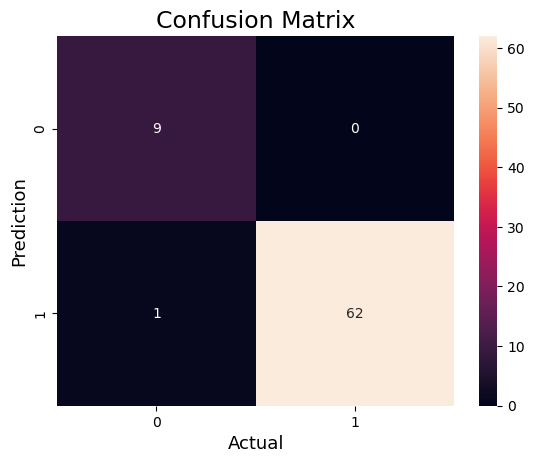

In [92]:
sns.heatmap(cm,annot=True,fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()